Loan Details & Credit History

All_No_of_TL :	Total number of trade lines (credit accounts).
All_open_TL	:	Number of currently open trade lines.
All_min_Vin_bureau	:	Minimum bureau score among various sources.
All_Vin_bureau	: Aggregate or average bureau score.
All_Delq_TL_24_M	:	Number of delinquent accounts in last 24 months.
No_of_enq_All	:	Number of credit inquiries made (hard pulls).
Latest_Bureau_prd	:	Possibly the most recent bureau report date.
Bureau_TL	:	Possibly a description or type of bureau trade line.
income_min, income_max, income_sum	: individual income ranges and total.
PROPERTY_INSURANCE_AMT:	Amount for property insurance (collateral-linked?).
FOIR2 :	Fixed Obligations to Income Ratio (debt-to-income ratio).
LTV : Loan amount to Value of Asset purchased ratio
edu_max, edu_min	:	Highest and lowest education levels (encoded).
age_max, age_min	:Age range of applicants (e.g., joint applicants).
cnt_coapplicant	:	Number of co-applicants.
Doc_form_16	:	Whether income proof (like Form 16 in India) is provided.
REQUESTED_TENURE	: Duration of requested loan (in months).
Loan_sub_type_1	:	Subcategory of the loan (e.g., car loan, home loan).
SAL_FLAG : Likely a binary flag indicating if salaried.
Organization_type	:	Type of employer or company.
CHANNEL_CODE	: Source/channel through which loan was applied (e.g., branch, online, agent).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Capstone Project DF.csv")

In [5]:
df.head()

,Unnamed: 0,Dummy_application_id,ever60_24m_StrictFlag,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Max_dependent,LTV,Doc_form_16,income_max,income_sum,...,emi_income_max,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL
0,0,4667539,0,Private Ltd. Co.,SALARIED,0,0.715563,0,11396.0000,11396.0000,...,0.456037,0.456037,4,2,32,2,0,8,CC,2.<6 CC
1,1,4670001,0,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,2,0.544463,0,26472.0833,26472.0833,...,0.472611,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS
2,2,4670389,0,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,6,0.566012,0,23487.5000,23487.5000,...,0.486684,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL
3,3,4670395,0,Others,SALARIED,0,0.536455,0,42270.0000,42270.0000,...,0.447599,0.447599,2,1,94,69,0,2,AL,13.>36 Others
4,4,4670451,0,Private Ltd. Co.,SERV-PRIVATE SECTOR,1,0.511949,0,17506.0000,17506.0000,...,0.619159,0.619159,1,-999,87,87,0,2,CC,11.>36 CC


In [7]:
df.shape

(13409, 35)

In [9]:
#Check for duplicates

df.duplicated('Dummy_application_id').sum()

0

In [11]:
#Removing Unnamed: 0 column & Dummy_application_id' column

df.drop(['Unnamed: 0','Dummy_application_id'], axis = 1, inplace = True)
df.shape

(13409, 33)

In [13]:
#Checking datatypes

df.dtypes.sort_values()

ever60_24m_StrictFlag       int64
All_No_of_TL                int64
City_tier                   int64
All_open_TL                 int64
All_Vin_bureau              int64
All_min_Vin_bureau          int64
cnt_coapplicant             int64
age_min                     int64
edu_min                     int64
age_max                     int64
Doc_form_16                 int64
Max_dependent               int64
All_Delq_TL_24_M            int64
No_of_enq_All               int64
edu_max                     int64
income_min                float64
emi_income_sum            float64
income_sum                float64
income_max                float64
REQUESTED_TENURE          float64
PROPERTY_INSURANCE_AMT    float64
LTV                       float64
FOIR2                     float64
emi_income_max            float64
Organization_type          object
Loan_sub_type_1            object
CHANNEL_CODE               object
SALARIED_SELF              object
Latest_Bureau_prd          object
OCCUPATION_TYP

In [15]:
df.dtypes.value_counts()

int64      15
object      9
float64     9
Name: count, dtype: int64

In [17]:
#Convert integer-encoded categorical features to object dtype

cat_int_cols = [col for col in df.select_dtypes(include = ['int']).columns if df[col].nunique() < 15 and col != 'ever60_24m_StrictFlag']
for col in cat_int_cols:
    print(f"{col} : {df[col].unique()}")

df[cat_int_cols] = df[cat_int_cols].astype('object')

Doc_form_16 : [0 1]
edu_max : [3 4 1 2 0]
edu_min : [2 3 1 4 0]
cnt_coapplicant : [1 0 2 3 4]
City_tier : [1 3 2]


In [19]:
df.dtypes.value_counts()

object     14
int64      10
float64     9
Name: count, dtype: int64

In [21]:
#Statistical summary of numerical columns

pd.set_option('display.max_columns', None)
df.describe()

,ever60_24m_StrictFlag,Max_dependent,LTV,income_max,income_sum,income_min,age_max,age_min,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,FOIR2,emi_income_max,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All
count,13409.000000,13409.000000,12869.000000,1.338400e+04,1.338400e+04,1.338400e+04,13409.000000,13409.000000,13409.000000,13409.000000,8.844000e+03,13289.000000,13289.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000
mean,0.073085,1.239839,0.605774,3.594421e+04,3.973012e+04,3.893080e+03,41.001566,31.687523,232.246775,7397.174510,3.721590e+03,128.322904,115.895273,3.856365,-185.501454,50.862257,20.355731,0.310836,-703.219479
std,0.260286,1.366872,0.191422,8.448169e+04,8.540767e+04,1.546474e+04,9.891939,6.866442,62.397026,10135.952837,2.508872e+05,6514.265879,6029.147150,5.506108,390.986913,37.625100,23.228050,0.761665,2717.935669
min,0.000000,0.000000,0.009176,-1.373667e+03,-1.169056e+05,-1.169056e+05,22.000000,2.000000,13.000000,0.000000,-1.000000e+01,0.002296,0.002287,1.000000,-999.000000,0.000000,0.000000,0.000000,-11111.000000
25%,0.000000,0.000000,0.479989,1.994875e+04,2.173950e+04,0.000000e+00,33.000000,27.000000,180.000000,0.000000,4.083919e+01,0.379615,0.355635,1.000000,1.000000,21.000000,5.000000,0.000000,2.000000
50%,0.000000,1.000000,0.626418,2.534933e+04,2.828333e+04,0.000000e+00,39.000000,30.000000,240.000000,5046.000000,5.233058e+01,0.530578,0.486978,2.000000,1.000000,43.000000,12.000000,0.000000,4.000000
75%,0.000000,2.000000,0.767087,3.474527e+04,4.035131e+04,0.000000e+00,48.000000,36.000000,240.000000,10688.000000,5.900000e+01,0.612346,0.587248,5.000000,3.000000,71.000000,27.000000,0.000000,7.000000
max,1.000000,52.000000,4.762585,5.500000e+06,5.521000e+06,1.411964e+06,90.000000,60.000000,360.000000,166884.000000,2.008283e+07,495654.261700,495654.261700,304.000000,159.000000,444.000000,300.000000,16.000000,148.000000


In [23]:
#Statistical summary of categorical columns

df.describe(include = 'object')

,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Doc_form_16,edu_max,edu_min,cnt_coapplicant,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,Latest_Bureau_prd,Bureau_TL
count,13345,13340,13409,13409,13409,13409,13409,13409,13409,13409,13409,13409,13409,13409
unique,14,61,2,5,5,5,5,3,8,3,5,2,12,12
top,Private Ltd. Co.,SALARIED,0,3,3,1,3.Private Ltd Co,SALARIED,CROSS SALES,2,Builder Ready,SAL,CL,10.<36 Others
freq,3489,5763,9703,7456,5435,12769,10113,7277,6212,6740,4550,7277,2948,2341


In [25]:
#While checking min/max found that -999  is used as placeholder in All_open_TL column.
#Replacing placeholder -999 from All_open_TL column with 0 since All_open_TL represents  the total number of open (active) credit accounts and -999 is used for closed accounts. If an account is closed, the number of open accounts is effectively 0.

df['All_open_TL'] = df['All_open_TL'].replace(-999,0)

#While checking min/max found that -11111  is used as placeholder in No_of_enq_All.
#Replacing it with nan since negative value is not valid for number of enquiries made.

df['No_of_enq_All'] = df['No_of_enq_All'].replace(-11111, np.nan)

In [27]:
#Checking for null values

df.isna().sum().sort_values(ascending = False)

FOIR2                     4565
No_of_enq_All              856
LTV                        540
emi_income_max             120
emi_income_sum             120
OCCUPATION_TYPE             69
NATURE_OF_ORGANISATION      64
income_max                  25
income_sum                  25
income_min                  25
ever60_24m_StrictFlag        0
All_No_of_TL                 0
SAL_FLAG                     0
All_Delq_TL_24_M             0
All_open_TL                  0
All_Vin_bureau               0
All_min_Vin_bureau           0
Latest_Bureau_prd            0
Loan_sub_type_1              0
Organization_type            0
City_tier                    0
CHANNEL_CODE                 0
SALARIED_SELF                0
PROPERTY_INSURANCE_AMT       0
REQUESTED_TENURE             0
cnt_coapplicant              0
age_min                      0
age_max                      0
edu_min                      0
edu_max                      0
Doc_form_16                  0
Max_dependent                0
Bureau_T

STUDY OF NUMERICAL VARIABLES & CORRELATION

In [31]:
#To compute correlation, you should only include numeric columns (i.e., those with int64 or float64 types).

num_cols = df.select_dtypes(include = 'number')
num_cols.head()

,ever60_24m_StrictFlag,Max_dependent,LTV,income_max,income_sum,income_min,age_max,age_min,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,FOIR2,emi_income_max,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All
0,0,0,0.715563,11396.0000,11396.0000,0.0,46,24,240.0,4553.0,NaN,0.456037,0.456037,4,2,32,2,0,8.0
1,0,2,0.544463,26472.0833,26472.0833,0.0,47,44,180.0,10307.0,47.261108,0.472611,0.472611,3,1,65,19,2,3.0
2,0,6,0.566012,23487.5000,23487.5000,0.0,35,35,240.0,7460.0,48.668441,0.486684,0.486684,2,2,47,37,0,2.0
3,0,0,0.536455,42270.0000,42270.0000,0.0,39,34,240.0,6744.0,44.759877,0.447599,0.447599,2,1,94,69,0,2.0
4,0,1,0.511949,17506.0000,17506.0000,0.0,32,28,324.0,0.0,61.915915,0.619159,0.619159,1,0,87,87,0,2.0


In [33]:
num_cols.shape

(13409, 19)

In [35]:
num_cols.describe()

,ever60_24m_StrictFlag,Max_dependent,LTV,income_max,income_sum,income_min,age_max,age_min,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,FOIR2,emi_income_max,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All
count,13409.000000,13409.000000,12869.000000,1.338400e+04,1.338400e+04,1.338400e+04,13409.000000,13409.000000,13409.000000,13409.000000,8.844000e+03,13289.000000,13289.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,12553.000000
mean,0.073085,1.239839,0.605774,3.594421e+04,3.973012e+04,3.893080e+03,41.001566,31.687523,232.246775,7397.174510,3.721590e+03,128.322904,115.895273,3.856365,1.946081,50.862257,20.355731,0.310836,6.496136
std,0.260286,1.366872,0.191422,8.448169e+04,8.540767e+04,1.546474e+04,9.891939,6.866442,62.397026,10135.952837,2.508872e+05,6514.265879,6029.147150,5.506108,2.506109,37.625100,23.228050,0.761665,7.940807
min,0.000000,0.000000,0.009176,-1.373667e+03,-1.169056e+05,-1.169056e+05,22.000000,2.000000,13.000000,0.000000,-1.000000e+01,0.002296,0.002287,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.479989,1.994875e+04,2.173950e+04,0.000000e+00,33.000000,27.000000,180.000000,0.000000,4.083919e+01,0.379615,0.355635,1.000000,1.000000,21.000000,5.000000,0.000000,2.000000
50%,0.000000,1.000000,0.626418,2.534933e+04,2.828333e+04,0.000000e+00,39.000000,30.000000,240.000000,5046.000000,5.233058e+01,0.530578,0.486978,2.000000,1.000000,43.000000,12.000000,0.000000,4.000000
75%,0.000000,2.000000,0.767087,3.474527e+04,4.035131e+04,0.000000e+00,48.000000,36.000000,240.000000,10688.000000,5.900000e+01,0.612346,0.587248,5.000000,3.000000,71.000000,27.000000,0.000000,8.000000
max,1.000000,52.000000,4.762585,5.500000e+06,5.521000e+06,1.411964e+06,90.000000,60.000000,360.000000,166884.000000,2.008283e+07,495654.261700,495654.261700,304.000000,159.000000,444.000000,300.000000,16.000000,148.000000


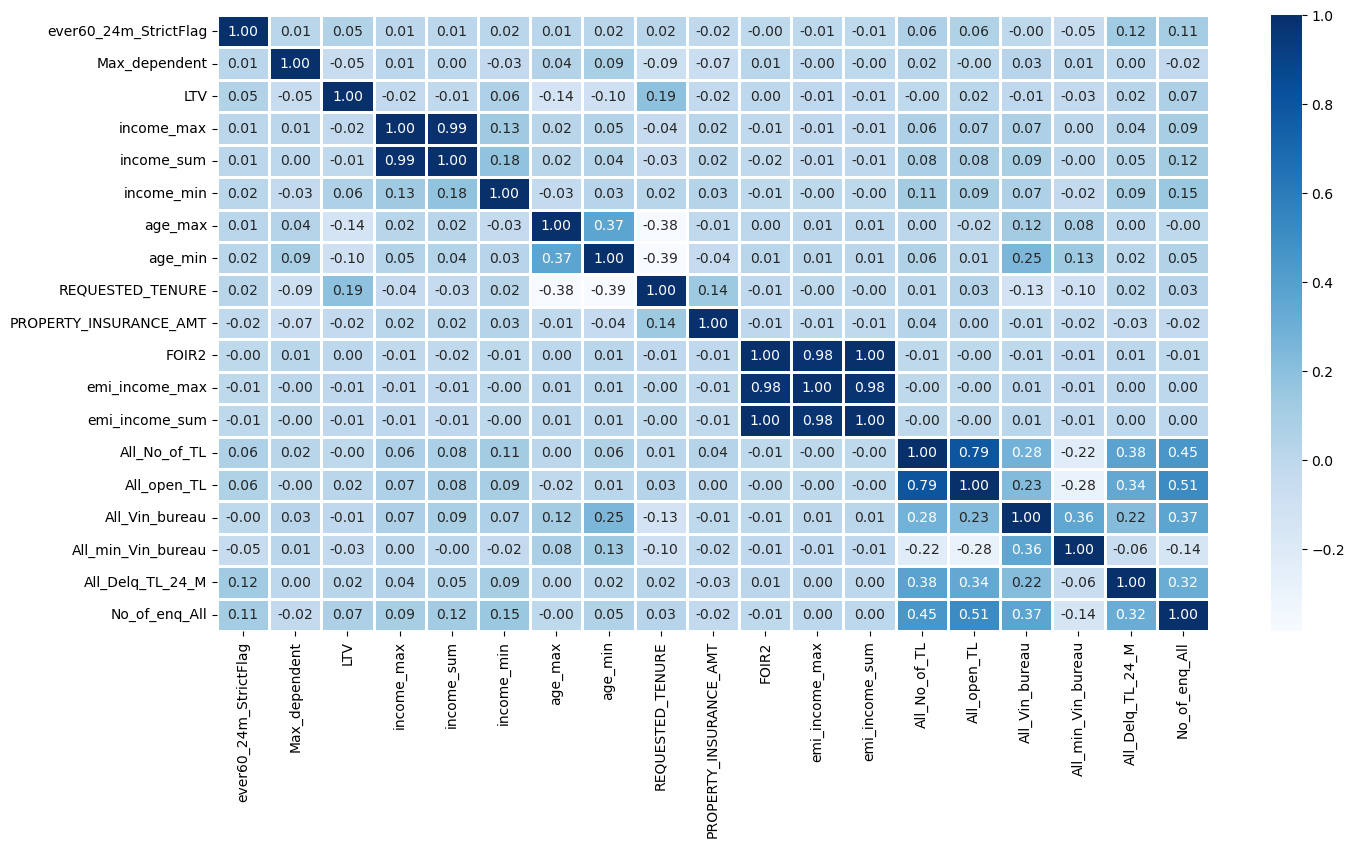

In [37]:
#Correlation matrix : to detect multicollinearity among input numerical features & dimensionality reduction.

correlation_matrix = num_cols.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot = True,
            fmt = '.2f',
            cmap = 'Blues',
            linewidth=1)
plt.show()

Columns with high correlation :

'emi_income_max' & 'emi_income_sum' (Same charcters)

'income_max' & 'income_sum' (Same characters)

'FOIR2' ( Debt to Income ratio) & 'emi_income_sum' (Different characters)

In [39]:
#Dropping columns with high correlation and similar character while keeping the other

df.drop(['emi_income_max','income_max'], axis = 1, inplace = True)

In [40]:
num_cols = df.select_dtypes(include = 'number')
num_cols.shape

(13409, 17)

STUDY OF TARGET VARIABLE

In [43]:
#Target Variable
#ever60_24m_StrictFlag :  whether the applicant had any 60+ day delinquencies in the past 24 months.

print(df['ever60_24m_StrictFlag'].unique())

[0 1]


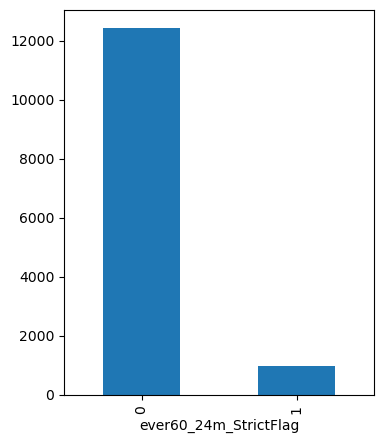

In [44]:
#Target classes count

plt.figure(figsize=(4,5))
df['ever60_24m_StrictFlag'].value_counts().plot(kind = 'bar')
plt.show()

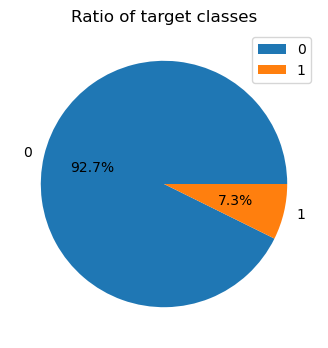

In [48]:
plt.figure(figsize = (6,4))
plt.pie( df['ever60_24m_StrictFlag'].value_counts(), labels = df['ever60_24m_StrictFlag'].value_counts().index,autopct='%1.1f%%')
plt.title("Ratio of target classes")
plt.legend()
plt.show()       

Data is heavily imbalanced. So we need to handle data imbalance

STUDY OF CATEGORICAL VARIABLES

In [55]:
#Categorical columns

cat_cols = df.select_dtypes(include = 'object')
cat_cols.head()

,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Doc_form_16,edu_max,edu_min,cnt_coapplicant,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,Latest_Bureau_prd,Bureau_TL
0,Private Ltd. Co.,SALARIED,0,3,2,1,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,CC,2.<6 CC
1,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,0,3,3,1,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,HL,7.<36 AL HL LAS
2,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,0,3,3,1,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,BL_PSL,12.>36 PL TWL GL
3,Others,SALARIED,0,3,3,1,1.Others,SALARIED,DSA,1,Builder UNC,SAL,AL,13.>36 Others
4,Private Ltd. Co.,SERV-PRIVATE SECTOR,0,3,3,1,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,CC,11.>36 CC


In [57]:
cat_cols.shape

(13409, 14)

In [59]:
cat_cols.describe()

,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Doc_form_16,edu_max,edu_min,cnt_coapplicant,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,Latest_Bureau_prd,Bureau_TL
count,13345,13340,13409,13409,13409,13409,13409,13409,13409,13409,13409,13409,13409,13409
unique,14,61,2,5,5,5,5,3,8,3,5,2,12,12
top,Private Ltd. Co.,SALARIED,0,3,3,1,3.Private Ltd Co,SALARIED,CROSS SALES,2,Builder Ready,SAL,CL,10.<36 Others
freq,3489,5763,9703,7456,5435,12769,10113,7277,6212,6740,4550,7277,2948,2341


In [61]:
#Categorical variables and its unique values

for col in cat_cols:  
    print(f"\nColumn : {col}")
    print(f"\n Unique values : ")
    print(df[col].unique())


Column : NATURE_OF_ORGANISATION

 Unique values : 
['Private Ltd. Co.' 'Proprietor-Proprietorship Firm (Staff Less than 25)'
 'Others' 'MNC' 'Public Ltd. Co.' 'Government'
 'Proprietor-Proprietorship Firm (Staff More than 25)'
 'Self Employed Professional'
 'Partner-Partnership Firm (Staff More than 10 & Less than 25)'
 'Partner-Partnership Firm (Staff Less than 10)' nan
 'Partner-Partnership Firm (Staff More than 25)'
 'Director-Pvt. Ltd. Co. (Staff Less than 50)'
 'Director-Pvt. Ltd. Co. (Staff More than 50)' 'Public Sector Undertaking']

Column : OCCUPATION_TYPE

 Unique values : 
['SALARIED' 'SELF-EMPLOYED' 'SERVICES' 'SERV-PRIVATE SECTOR' 'SALESMAN'
 'SAL(RETIRAL AGE 58)' 'MANUFACTURING' 'ATTORNEY AT LAW' 'TRADING'
 'GOVERNMENT SERVICE' 'PROPRIETOR' 'BUSINESSMAN' 'SERV-PUBLIC SECTOR'
 'SAL(RETIRAL AGE 60)' nan 'OTHERS' 'DIRECTOR' 'JEWELLER' 'OFFICER'
 'CONTRACTOR' 'ADVISOR' 'AGENT' 'OPERATOR' 'MANAGER'
 'DOCTOR-SELF EMPLOYED' 'JOURNALIST' 'INDUSTRY' 'ACCOUNTANT'
 'DOCTOR-SALARIED

TREATING NULL VALUES

In [66]:
df.isna().sum().sort_values(ascending = False)

FOIR2                     4565
No_of_enq_All              856
LTV                        540
emi_income_sum             120
OCCUPATION_TYPE             69
NATURE_OF_ORGANISATION      64
income_sum                  25
income_min                  25
All_No_of_TL                 0
Loan_sub_type_1              0
SAL_FLAG                     0
ever60_24m_StrictFlag        0
All_open_TL                  0
All_Vin_bureau               0
City_tier                    0
All_Delq_TL_24_M             0
Latest_Bureau_prd            0
All_min_Vin_bureau           0
Organization_type            0
CHANNEL_CODE                 0
SALARIED_SELF                0
PROPERTY_INSURANCE_AMT       0
REQUESTED_TENURE             0
cnt_coapplicant              0
age_min                      0
age_max                      0
edu_min                      0
edu_max                      0
Doc_form_16                  0
Max_dependent                0
Bureau_TL                    0
dtype: int64

FOIR2 is a critical column and has the most null values & hence need to be treated using imputation techniques.
But while checking correlation FOIR2 is highly correlated with emi_income_sum , so we can remove FOIR2 and keep emi_income_sum which has less null values

In [69]:
#Dropping FOIR2 column

df.drop('FOIR2', axis = 1, inplace = True)

In [71]:
#Considering minimum net monthly income of 10,000 is required for loan eligibility

df = df[df['income_sum']>= 10000]
df.shape

(13240, 30)

In [73]:
#emi_income_sum	: EMI-related ratios to income (Emi / Income)
#Ratios like EMI/Income should logically fall between 0 and 1.

df=df[df['emi_income_sum'].between(0,1)]

In [75]:
df.shape

(13109, 30)

In [77]:
df.isna().sum().sort_values(ascending = False)[:7]

No_of_enq_All             834
LTV                       415
OCCUPATION_TYPE            46
NATURE_OF_ORGANISATION     41
ever60_24m_StrictFlag       0
CHANNEL_CODE                0
Latest_Bureau_prd           0
dtype: int64

Most of the null values have been removed by basic techniques

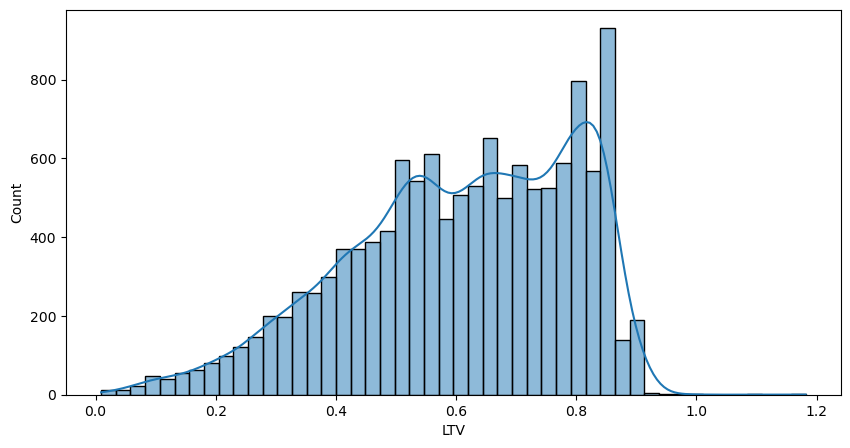

In [80]:
#LTV Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['LTV'], kde = True)
plt.show()

Distribution of LTV is left skewed.

In [82]:
#We use median imputation method for skewed data

df['LTV'] = df['LTV'].fillna(df['LTV'].median())

In [85]:
df.isna().sum().sort_values(ascending = False)[:7]

No_of_enq_All             834
OCCUPATION_TYPE            46
NATURE_OF_ORGANISATION     41
ever60_24m_StrictFlag       0
SALARIED_SELF               0
Latest_Bureau_prd           0
All_Delq_TL_24_M            0
dtype: int64

In [87]:
#Cramer’s V correlation to measure the association between two categorical attributes

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [89]:
#Checking correlation between columns 'Organization_type' & 'NATURE_OF_ORGANISATION' usinf Cramer’s V method

cramers_v(df['Organization_type'], df['NATURE_OF_ORGANISATION'])

1.0

In [91]:
#Cross-tabulation between columns 'Organization_type' & 'NATURE_OF_ORGANISATION'  

pd.crosstab(df['Organization_type'], df['NATURE_OF_ORGANISATION'])

NATURE_OF_ORGANISATION,Director-Pvt. Ltd. Co. (Staff Less than 50),Director-Pvt. Ltd. Co. (Staff More than 50),Government,MNC,Others,Partner-Partnership Firm (Staff Less than 10),Partner-Partnership Firm (Staff More than 10 & Less than 25),Partner-Partnership Firm (Staff More than 25),Private Ltd. Co.,Proprietor-Proprietorship Firm (Staff Less than 25),Proprietor-Proprietorship Firm (Staff More than 25),Public Ltd. Co.,Public Sector Undertaking,Self Employed Professional
Organization_type,,,,,,,,,,,,,,
1.Others,0,0,0,0,765,0,0,0,0,0,0,0,0,210
2.Govt,0,0,1276,0,0,0,0,0,0,0,0,0,10,0
3.Private Ltd Co,140,18,0,0,0,80,107,224,3426,3392,2527,0,0,0
4.Public Ltd. Co.,0,0,0,0,0,0,0,0,0,0,0,751,0,0
5.MNC,0,0,0,142,0,0,0,0,0,0,0,0,0,0


Both these columns are highly associated. Categories in 'NATURE_OF_ORGANISATION are already mapped in Organization_type column. Hence we can remove NATURE_OF_ORGANISATION 

In [94]:
df.drop('NATURE_OF_ORGANISATION', axis = 1, inplace = True)

In [96]:
df.isna().sum().sort_values(ascending = False)[:7]

No_of_enq_All            834
OCCUPATION_TYPE           46
ever60_24m_StrictFlag      0
SALARIED_SELF              0
Latest_Bureau_prd          0
All_Delq_TL_24_M           0
All_min_Vin_bureau         0
dtype: int64

In [98]:
#Checking correlation between columns 'Organization_type' & 'NATURE_OF_ORGANISATION' using Cramer’s V method

cramers_v(df['OCCUPATION_TYPE'], df['SALARIED_SELF'])

0.6992629049559279

In [100]:
#Cross-tabulation between columns 'OCCUPATION_TYPE' & 'SALARIED_SELF'

pd.crosstab(df['OCCUPATION_TYPE'],['SALARIED_SELF'])

col_0,SALARIED_SELF
OCCUPATION_TYPE,
ACCOUNTANT,9
ADMINSTRATOR,2
ADVISOR,4
AGENT,22
AGRICULTURIST,1
...,...
TAXI DRIVER,2
TEACHER,9
TECHNICIAN,2


Both these columns are highly associated. Categories in OCCUPATION_TYPE are already mapped in SALARIED_SELF column. Hence we can remove OCCUPATION_TYPE

In [103]:
df.drop('OCCUPATION_TYPE',axis = 1, inplace = True)

In [105]:
df.isna().sum().sort_values(ascending = False)[:7]

No_of_enq_All            834
ever60_24m_StrictFlag      0
Max_dependent              0
Latest_Bureau_prd          0
All_Delq_TL_24_M           0
All_min_Vin_bureau         0
All_Vin_bureau             0
dtype: int64

In [107]:
df['No_of_enq_All'].value_counts().sort_index()

No_of_enq_All
1.0      1933
2.0      1935
3.0      1558
4.0      1259
5.0       988
         ... 
101.0       1
102.0       2
115.0       1
123.0       1
148.0       1
Name: count, Length: 83, dtype: int64

<Axes: ylabel='Frequency'>

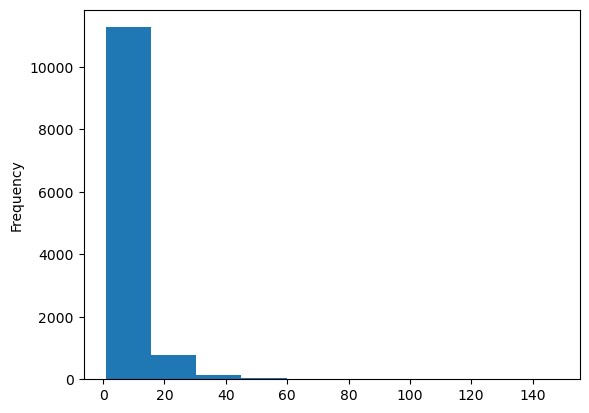

In [109]:
df['No_of_enq_All'].plot(kind = 'hist')

In [110]:
#Binning 

def enquiry_risk_bin(x):
    if pd.isna(x) or x == 0:
        return 'No Risk'
    elif x <= 5:
        return 'Low Risk'
    elif x <= 10:
        return 'Moderate Risk'   
    else:
        return 'High Risk'

df['enquiry_risk'] = df['No_of_enq_All'].apply(enquiry_risk_bin)

In [112]:
df.drop('No_of_enq_All', axis = 1, inplace = True)

In [115]:
df.shape

(13109, 28)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13109 entries, 0 to 13408
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ever60_24m_StrictFlag   13109 non-null  int64  
 1   Max_dependent           13109 non-null  int64  
 2   LTV                     13109 non-null  float64
 3   Doc_form_16             13109 non-null  object 
 4   income_sum              13109 non-null  float64
 5   income_min              13109 non-null  float64
 6   edu_max                 13109 non-null  object 
 7   edu_min                 13109 non-null  object 
 8   age_max                 13109 non-null  int64  
 9   age_min                 13109 non-null  int64  
 10  cnt_coapplicant         13109 non-null  object 
 11  REQUESTED_TENURE        13109 non-null  float64
 12  PROPERTY_INSURANCE_AMT  13109 non-null  float64
 13  Organization_type       13109 non-null  object 
 14  SALARIED_SELF           13109 non-null  obj

In [120]:
#Remaining Numerical columns after performing all null value treatment

num_cols  = df.select_dtypes(include = ['number'])
num_cols.shape

(13109, 15)

In [122]:
#Remaining Categorical columns after performing all null value treatment

cat_cols = df.select_dtypes(include = ['object'])
cat_cols.shape

(13109, 13)

CONTINUOUS NUMERICAL COLUMNS 

DISTRIBUTION OF CONTINUOUS NUMERICAL COLUMNS FOR EVALUATING SKEWNESS OF DATA

In [126]:
num_cols.nunique().sort_values(ascending = False)

emi_income_sum            13023
LTV                       11503
income_sum                10485
PROPERTY_INSURANCE_AMT     4651
income_min                 1975
All_Vin_bureau              220
All_min_Vin_bureau          157
REQUESTED_TENURE             72
age_max                      60
All_No_of_TL                 55
age_min                      45
All_open_TL                  28
All_Delq_TL_24_M             16
Max_dependent                15
ever60_24m_StrictFlag         2
dtype: int64

In [128]:
#We use columns with high cardinality as continuous columns

cont_num_cols = ['emi_income_sum','LTV','income_sum','PROPERTY_INSURANCE_AMT','income_min','All_Vin_bureau','All_min_Vin_bureau']

In [130]:
df[cont_num_cols].columns.nunique()

7

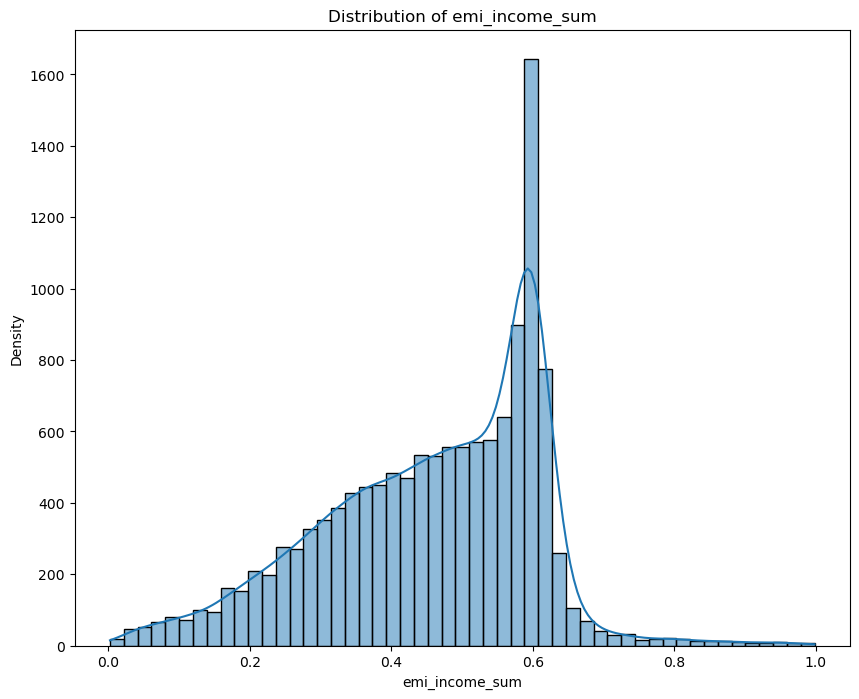

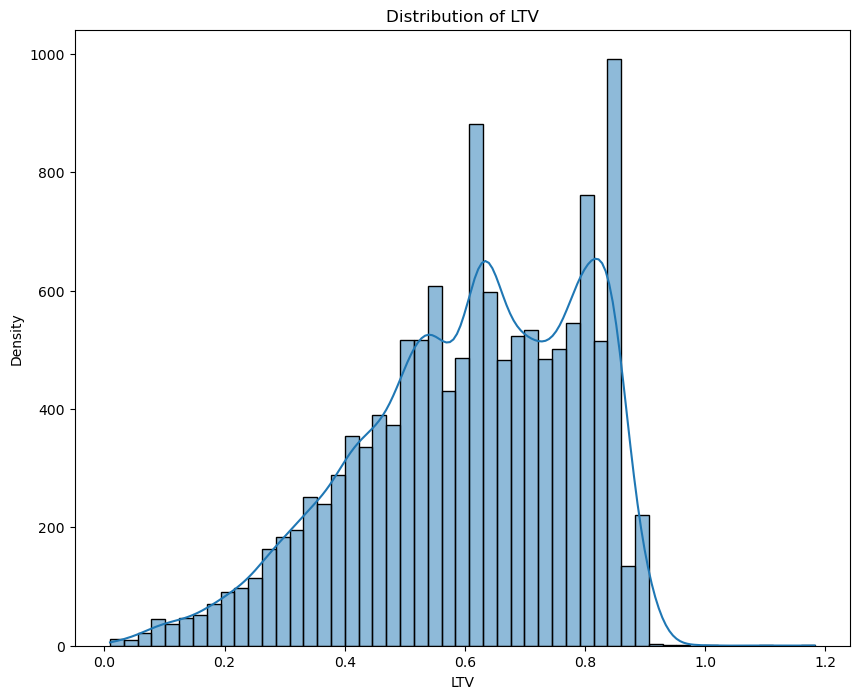

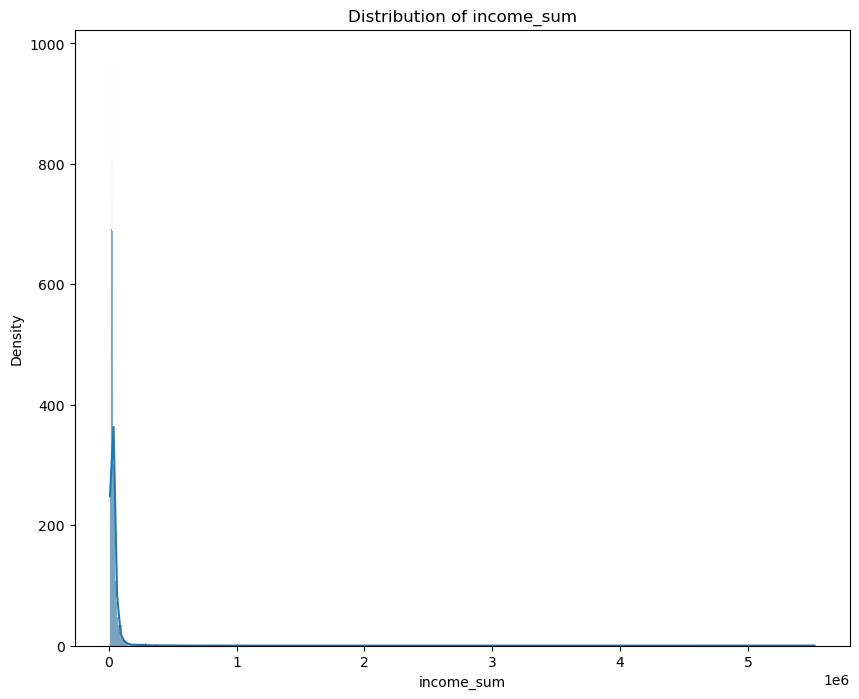

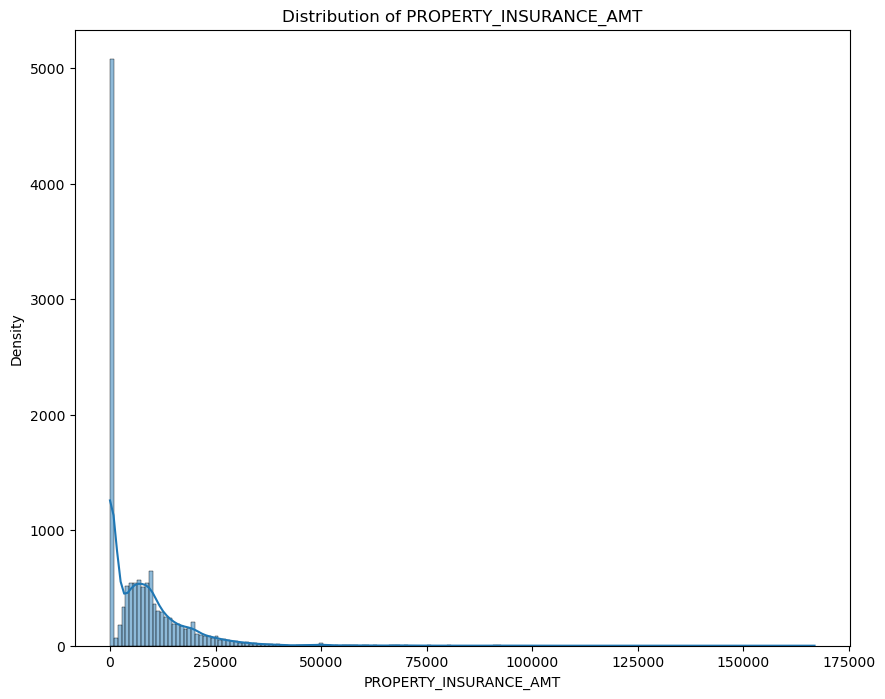

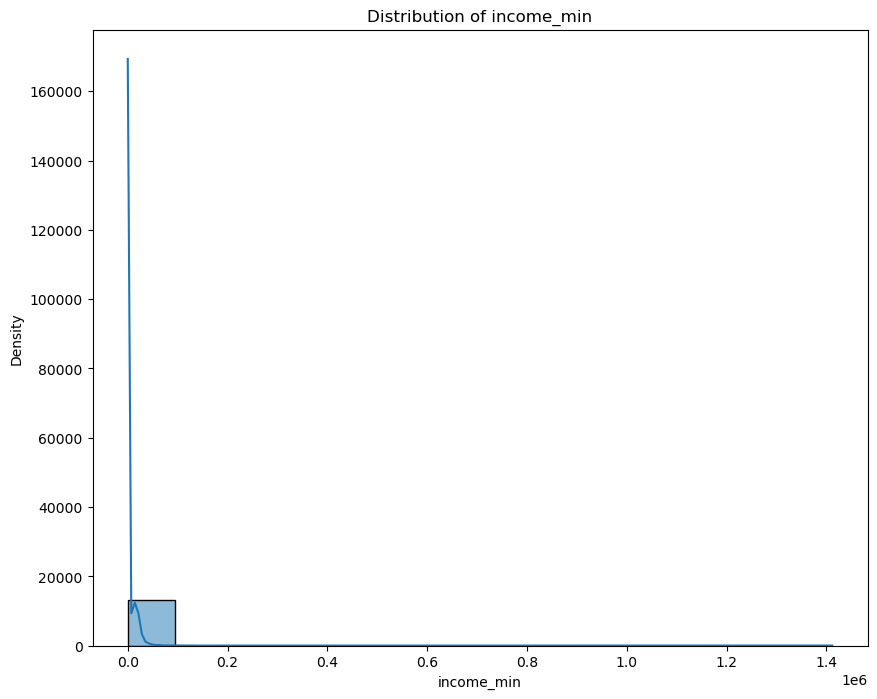

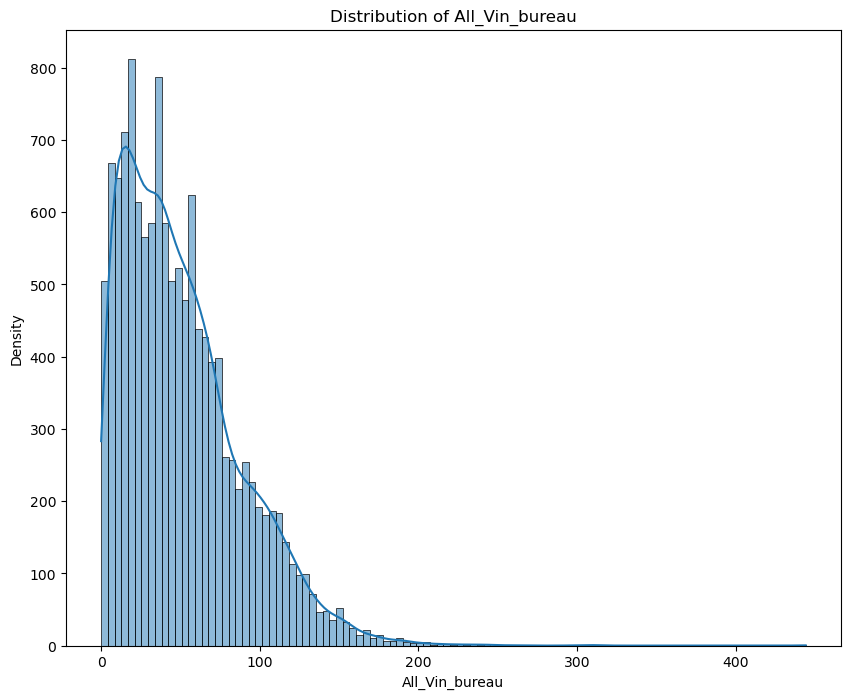

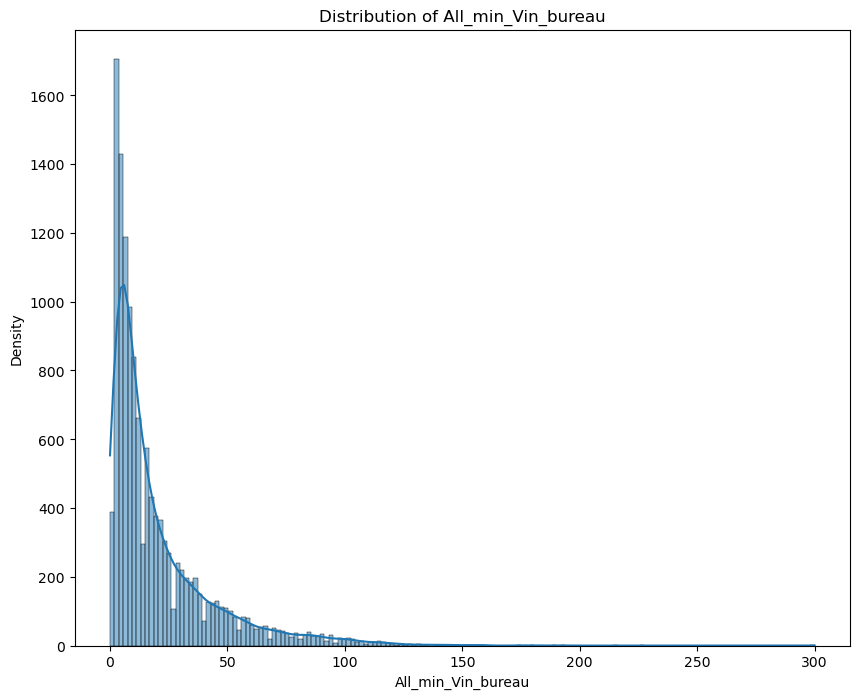

In [132]:
#PLoting Distribution 

for i in cont_num_cols:
    plt.figure(figsize=(10,8))
    fig = sns.histplot(df[i],kde = True)
    fig.set_ylabel('Density')
    fig.set_xlabel(i)
    plt.title(f"Distribution of {i}")
    plt.tight_layout
    plt.show()

In [133]:
#Checking skewed columns

skewed=[]
for i in cont_num_cols:
    if df[i].skew() < -0.5 or df[i].skew() > 0.5:
        skewed.append(i)

skewed

['LTV',
 'income_sum',
 'PROPERTY_INSURANCE_AMT',
 'income_min',
 'All_Vin_bureau',
 'All_min_Vin_bureau']

OUTLIER DETECTION

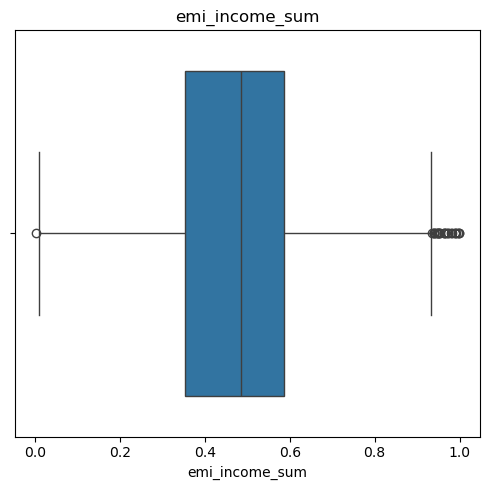

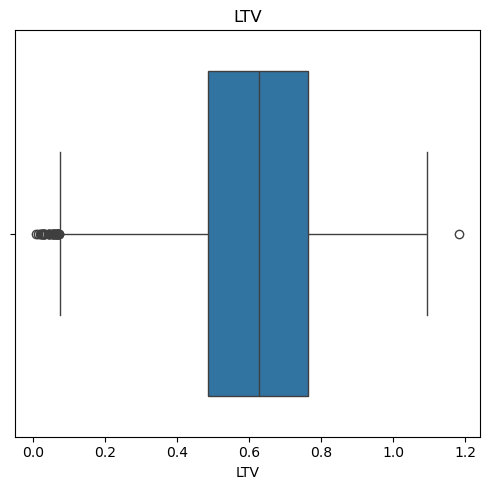

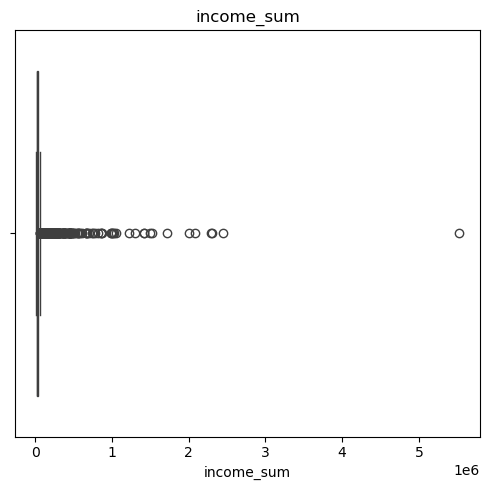

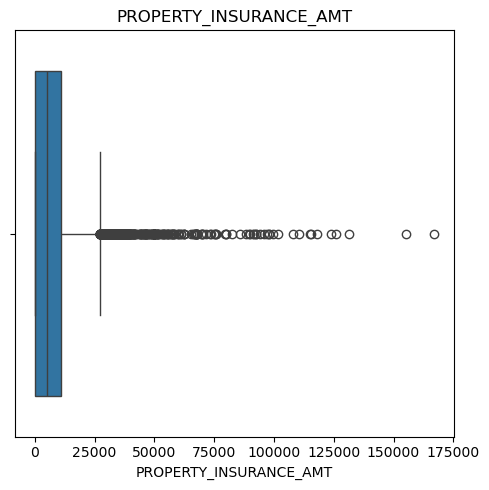

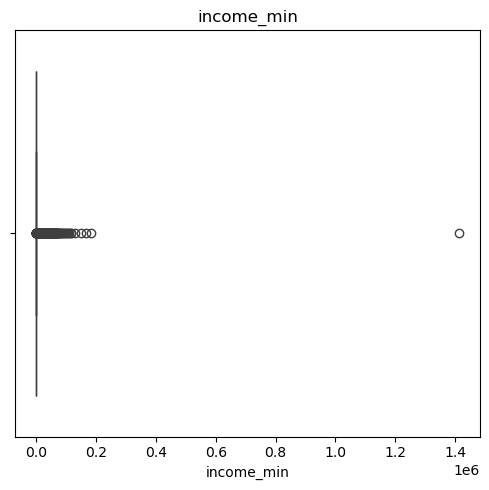

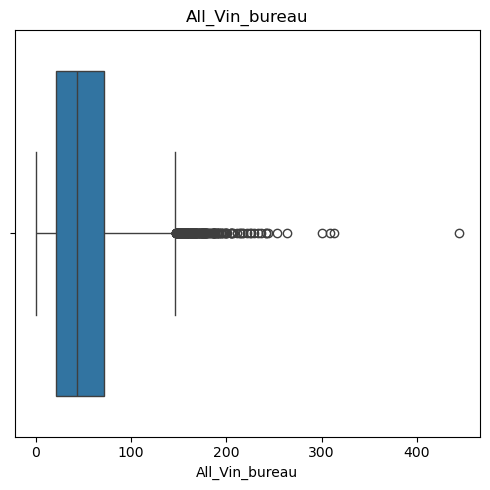

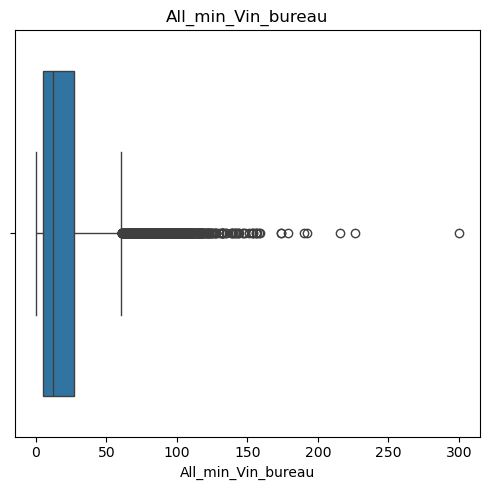

In [136]:
#Box PLot

for col in cont_num_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(x = df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [137]:
#Finding outliers info using IQR Method

outlier_info = {}

for col in cont_num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    outlier_info[col] = {
        'Lower limit': lower_limit,
        'Upper limit': upper_limit,
        'Outlier count': len(outliers)
    }

for col,info in outlier_info.items():
    print(f"\n{col} : \n Number of outliers : {info['Outlier count']}")
    print(f" Outlier info : \n Lower Limit : {info['Lower limit']} \n Upper limit : {info['Upper limit']}")


emi_income_sum : 
 Number of outliers : 26
 Outlier info : 
 Lower Limit : 0.005546264500000009 
 Upper limit : 0.9336594524999999

LTV : 
 Number of outliers : 39
 Outlier info : 
 Lower Limit : 0.07338796750000004 
 Upper limit : 1.1768320195

income_sum : 
 Number of outliers : 964
 Outlier info : 
 Lower Limit : -5862.875 
 Upper limit : 68444.125

PROPERTY_INSURANCE_AMT : 
 Number of outliers : 487
 Outlier info : 
 Lower Limit : -16278.0 
 Upper limit : 27130.0

income_min : 
 Number of outliers : 2718
 Outlier info : 
 Lower Limit : 0.0 
 Upper limit : 0.0

All_Vin_bureau : 
 Number of outliers : 242
 Outlier info : 
 Lower Limit : -54.0 
 Upper limit : 146.0

All_min_Vin_bureau : 
 Number of outliers : 905
 Outlier info : 
 Lower Limit : -28.0 
 Upper limit : 60.0


We should always Treat Outliers First, Then Handle Skewness.

Outliers can distort skewness statistics significantly.
If you transform a skewed distribution before removing outliers, the transformation may overcompensate or fail due to extreme values.
By handling outliers first, your skewness reflects the true distribution of most of your data

TREATING OUTLIERS AND SKEWNESS OF CONTINUOUS NUMERICAL COLUMNS

1. emi_income_sum

-0.4720892633801039

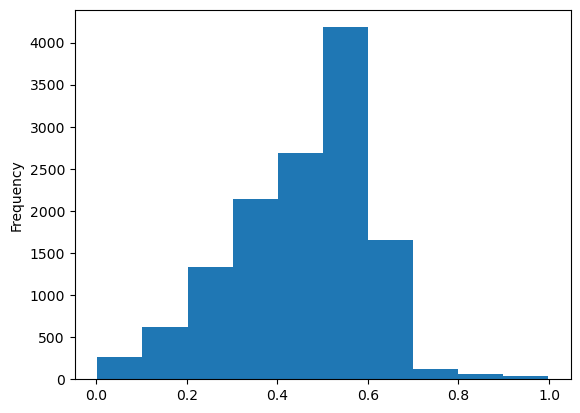

In [143]:
#Skewness before outlier removal

df['emi_income_sum'].plot(kind = 'hist')
df['emi_income_sum'].skew()

Data is approximately symmetric. No need to transform

2. LTV

-0.5418547840974632

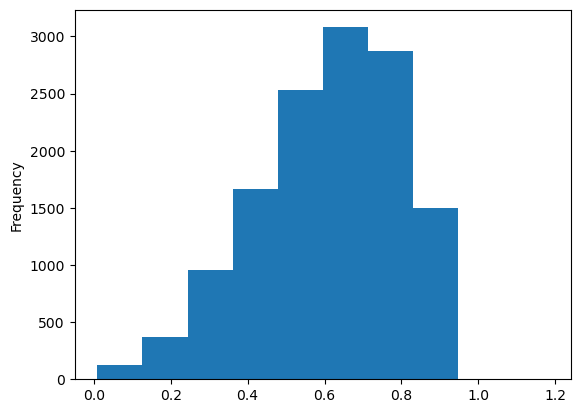

In [146]:
#Skewness before outlier removal

df['LTV'].plot(kind='hist')
df['LTV'].skew()

In [147]:
#Removing rows with LTV greater than 1 since Loan to Value of Property ratio cannot be above than 1

df=df[df['LTV']<1]

In [148]:
#Applying quantile-based capping using the 1st and 99th percentiles for the LTV (Loan-to-Value) ratio.This is a robust and preferred method when:
#You want to reduce the influence of extreme values without deleting data.
#Outliers may be informative (e.g., high LTV may correlate with default).

q1 = df['LTV'].quantile(0.01)
q99 = df['LTV'].quantile(0.99)
df['LTV_capped'] = df['LTV'].clip(lower=q1, upper=q99)

-0.511425397782636

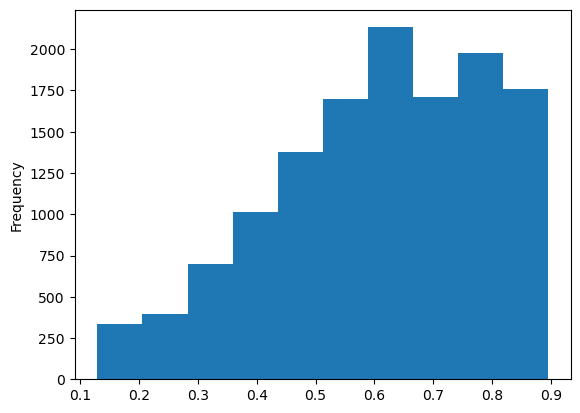

In [149]:
#Skewness after outlier removal

df['LTV_capped'].plot(kind='hist')
df['LTV_capped'].skew()

In [150]:
#Square  Transformation for slightly skewed data

df['LTV_sq'] = df['LTV_capped'] ** 2

0.04865370838795413

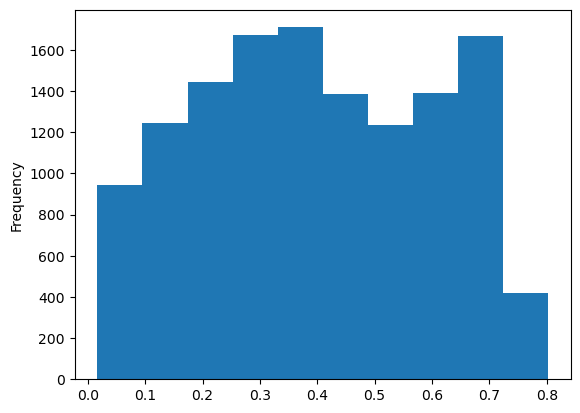

In [151]:
#Skewness after transformation

df['LTV_sq'].plot(kind = 'hist')
df['LTV_sq'].skew()

Data is now approximately symmetric

3. income_sum

30.162312068674066

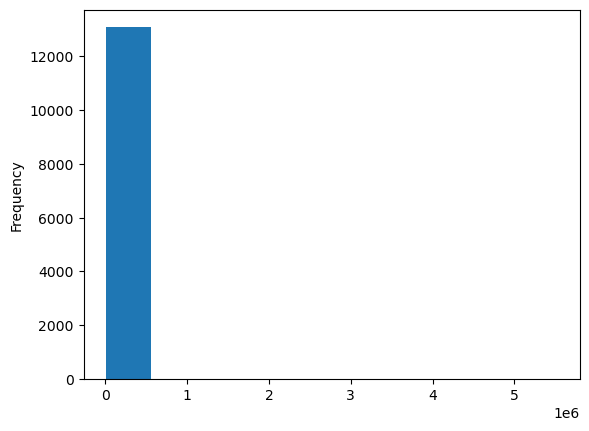

In [154]:
#Skewness before outlier removal

df['income_sum'].plot(kind = 'hist')
df['income_sum'].skew()

In [155]:
#Lower limit is negative and income cannot be negative. So removing negative values

df = df[df['income_sum'] >= 0]

In [156]:
#Applying quantile-based capping since there may be cases where individuals can have high income

q1 = df['income_sum'].quantile(0.01)
q99 = df['income_sum'].quantile(0.99)
df['income_sum_q_capped'] = df['income_sum'].clip(lower=q1, upper=q99)

4.009198746194967

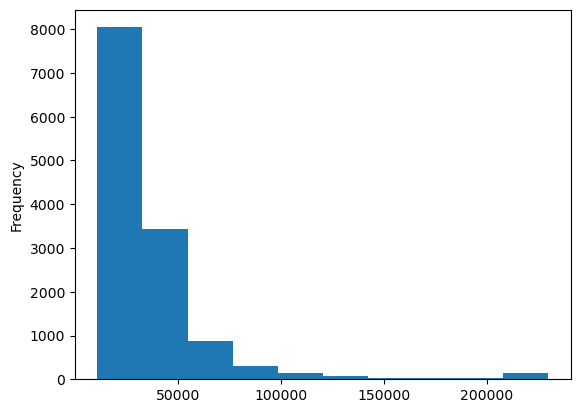

In [157]:
#Skewness after outlier removal

df['income_sum_q_capped'].plot(kind = 'hist')
df['income_sum_q_capped'].skew()

In [158]:
#Log Transformation on quantile based capped data for right skewed data

df['LOG_income_sum_q_capped'] = np.log1p(df['income_sum_q_capped'])

0.9403831092550871

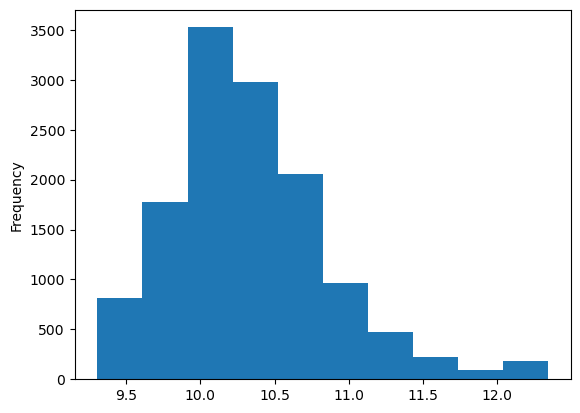

In [159]:
#Skewness after transformation

df['LOG_income_sum_q_capped'].plot(kind = 'hist')
df['LOG_income_sum_q_capped'].skew()

Data is still mildly right-skewed

In [161]:
#Applying IQR based capping

Q1 = df['income_sum'].quantile(0.25)
Q3 = df['income_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['income_sum'] >= lower_limit) & (df['income_sum'] <= upper_limit)]

0.8435735010351871

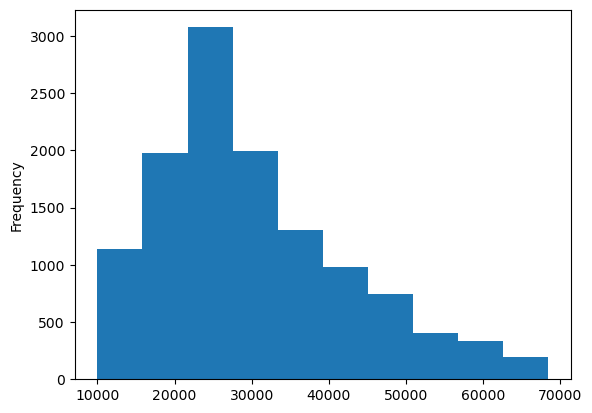

In [162]:
df['income_sum'].plot(kind = 'hist')
df['income_sum'].skew()

In [163]:
#Log Transformation on IQR based capped data

df['LOG_income_sum'] = np.log1p(df['income_sum'])

-0.05471297606807578

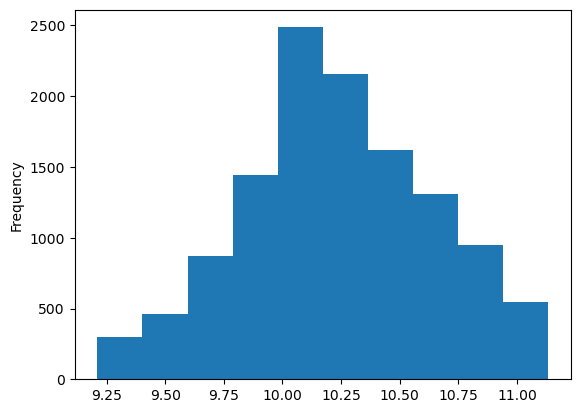

In [164]:
#Skewness after transformation

df['LOG_income_sum'].plot(kind = 'hist')
df['LOG_income_sum'].skew()

Data is now approximately symmetric

4. PROPERTY_INSURANCE_AMOUNT

3.490632061195955

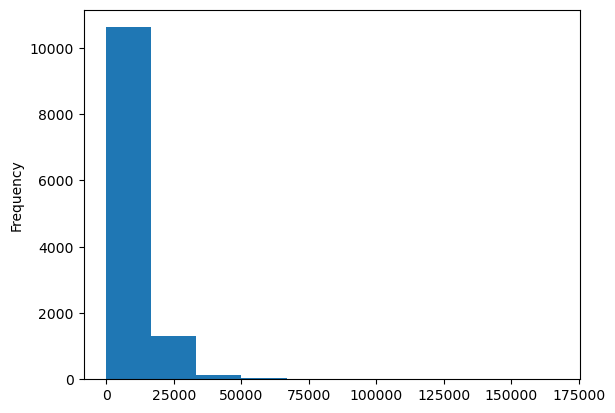

In [167]:
df['PROPERTY_INSURANCE_AMT'].plot(kind='hist')
df['PROPERTY_INSURANCE_AMT'].skew()

In [168]:
#Applying quantile-based capping

q1 = df['PROPERTY_INSURANCE_AMT'].quantile(0.01)
q99 = df['PROPERTY_INSURANCE_AMT'].quantile(0.99)

df['PROPERTY_INSURANCE_AMT'] = df['PROPERTY_INSURANCE_AMT'].clip(lower=q1, upper=q99)

<Axes: ylabel='Frequency'>

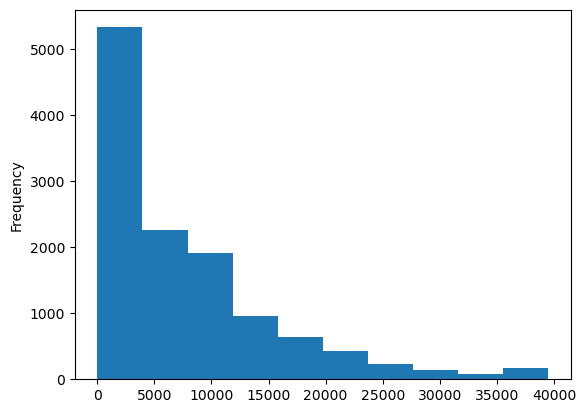

In [169]:
df['PROPERTY_INSURANCE_AMT'].plot(kind='hist')

In [170]:
df['LOG_PROPERTY_INSURANCE_AMT'] = np.log1p(df['PROPERTY_INSURANCE_AMT'])

-0.4471154568106943

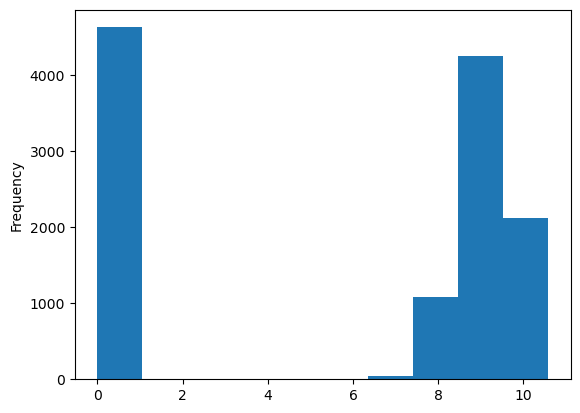

In [171]:
df['LOG_PROPERTY_INSURANCE_AMT'].plot(kind='hist')
df['LOG_PROPERTY_INSURANCE_AMT'].skew()

The Log-transformed distribution is bimodal with a spike at zero, and many values are exactly zero, this suggests a zero-inflated distribution — a common situation in real-world financial or insurance data.

Since PROPERTY_INSURANCE_AMT column data doesn't provide any numerical continuity, lets convert it into categorical variable. 
Customers with property insurance and without insurance

In [174]:
df['HAS_INSURANCE'] = (df['PROPERTY_INSURANCE_AMT'] > 0).astype('int')

5. income_min

2.3869432119397307

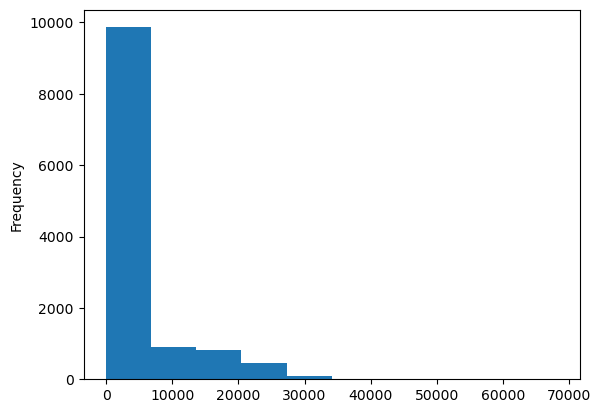

In [178]:
df['income_min'].plot(kind='hist')
df['income_min'].skew()

In [179]:
#Checking percentage of zeros in minimum income

zero_percentage = (df['income_min'] == 0).mean() * 100
zero_percentage

80.21082104916412

In [180]:
#High percentage of zeros means mostly minimum income is unknown data, hence we are removing the column

df.drop(columns=['income_min'], inplace=True)

6. All_Vin_bureau & 7. All_min_Vin_bureau

1.1854869060545614

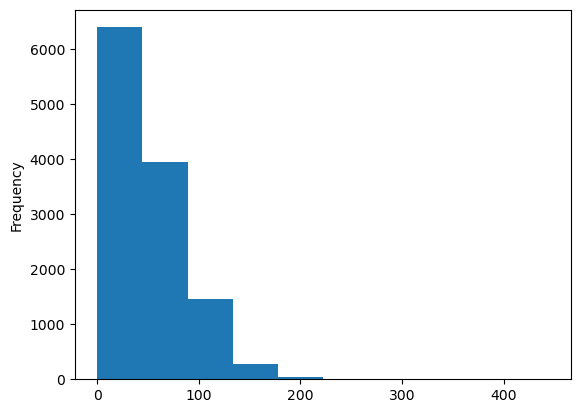

In [182]:
df['All_Vin_bureau'].plot(kind = 'hist')
df['All_Vin_bureau'].skew()

In [185]:
df['All_Vin_bureau'].corr(df['ever60_24m_StrictFlag'])

-0.005938637054348405

In [186]:
df[['All_Vin_bureau', 'All_min_Vin_bureau']].corr() 

,All_Vin_bureau,All_min_Vin_bureau
All_Vin_bureau,1.000000,0.378082
All_min_Vin_bureau,0.378082,1.000000


In [187]:
df[['All_Vin_bureau', 'ever60_24m_StrictFlag']].corr()

,All_Vin_bureau,ever60_24m_StrictFlag
All_Vin_bureau,1.000000,-0.005939
ever60_24m_StrictFlag,-0.005939,1.000000


Dropping All_Vin_bureau & All_min_Vin_bureau columns as they donot provide any significance in modeling

Dropping raw data and keeping transformed data

In [191]:
df.drop(columns = ['LTV','income_sum','PROPERTY_INSURANCE_AMT','All_Vin_bureau','All_min_Vin_bureau','LTV_capped','income_sum_q_capped','LOG_income_sum_q_capped','LOG_PROPERTY_INSURANCE_AMT'],axis = 1, inplace = True)

In [193]:
df.head()

,ever60_24m_StrictFlag,Max_dependent,Doc_form_16,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Delq_TL_24_M,Latest_Bureau_prd,Bureau_TL,enquiry_risk,LTV_sq,LOG_income_sum,HAS_INSURANCE
0,0,0,0,3,2,46,24,1,240.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,0,CC,2.<6 CC,Moderate Risk,0.512031,9.341105,1
1,0,2,0,3,3,47,44,1,180.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,2,HL,7.<36 AL HL LAS,Low Risk,0.296440,10.183884,1
2,0,6,0,3,3,35,35,1,240.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,0,BL_PSL,12.>36 PL TWL GL,Low Risk,0.320369,10.064266,1
3,0,0,0,3,3,39,34,1,240.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,0,AL,13.>36 Others,Low Risk,0.287784,10.651857,1
4,0,1,0,3,3,32,28,1,324.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,0,CC,11.>36 CC,Low Risk,0.262092,9.770356,0


In [196]:
df.shape

(12143, 25)

In [197]:
df.columns

Index(['ever60_24m_StrictFlag', 'Max_dependent', 'Doc_form_16', 'edu_max',
       'edu_min', 'age_max', 'age_min', 'cnt_coapplicant', 'REQUESTED_TENURE',
       'Organization_type', 'SALARIED_SELF', 'CHANNEL_CODE', 'City_tier',
       'Loan_sub_type_1', 'SAL_FLAG', 'emi_income_sum', 'All_No_of_TL',
       'All_open_TL', 'All_Delq_TL_24_M', 'Latest_Bureau_prd', 'Bureau_TL',
       'enquiry_risk', 'LTV_sq', 'LOG_income_sum', 'HAS_INSURANCE'],
      dtype='object')

In [198]:
num_cols = df.select_dtypes(include = 'number')
num_cols.shape

(12143, 12)

In [201]:
num_cols.columns

Index(['ever60_24m_StrictFlag', 'Max_dependent', 'age_max', 'age_min',
       'REQUESTED_TENURE', 'emi_income_sum', 'All_No_of_TL', 'All_open_TL',
       'All_Delq_TL_24_M', 'LTV_sq', 'LOG_income_sum', 'HAS_INSURANCE'],
      dtype='object')

In [202]:
num_cols.describe()

,ever60_24m_StrictFlag,Max_dependent,age_max,age_min,REQUESTED_TENURE,emi_income_sum,All_No_of_TL,All_open_TL,All_Delq_TL_24_M,LTV_sq,LOG_income_sum,HAS_INSURANCE
count,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000
mean,0.070411,1.244585,40.836037,31.522688,233.215021,0.473292,3.632298,1.823684,0.288973,0.403597,10.233507,0.618463
std,0.255849,1.381800,9.894696,6.792241,62.279177,0.140127,5.194783,2.376543,0.715328,0.210208,0.406832,0.485784
min,0.000000,0.000000,22.000000,8.000000,36.000000,0.019636,1.000000,0.000000,0.000000,0.016567,9.210440,0.000000
25%,0.000000,0.000000,33.000000,26.000000,180.000000,0.375956,1.000000,1.000000,0.000000,0.235793,9.973371,0.000000
50%,0.000000,1.000000,39.000000,30.000000,240.000000,0.496005,2.000000,1.000000,0.000000,0.394458,10.212925,1.000000
75%,0.000000,2.000000,48.000000,36.000000,240.000000,0.588600,4.000000,2.000000,0.000000,0.587634,10.521911,1.000000
max,1.000000,52.000000,90.000000,60.000000,360.000000,0.998253,304.000000,159.000000,15.000000,0.802491,11.133436,1.000000


<Axes: >

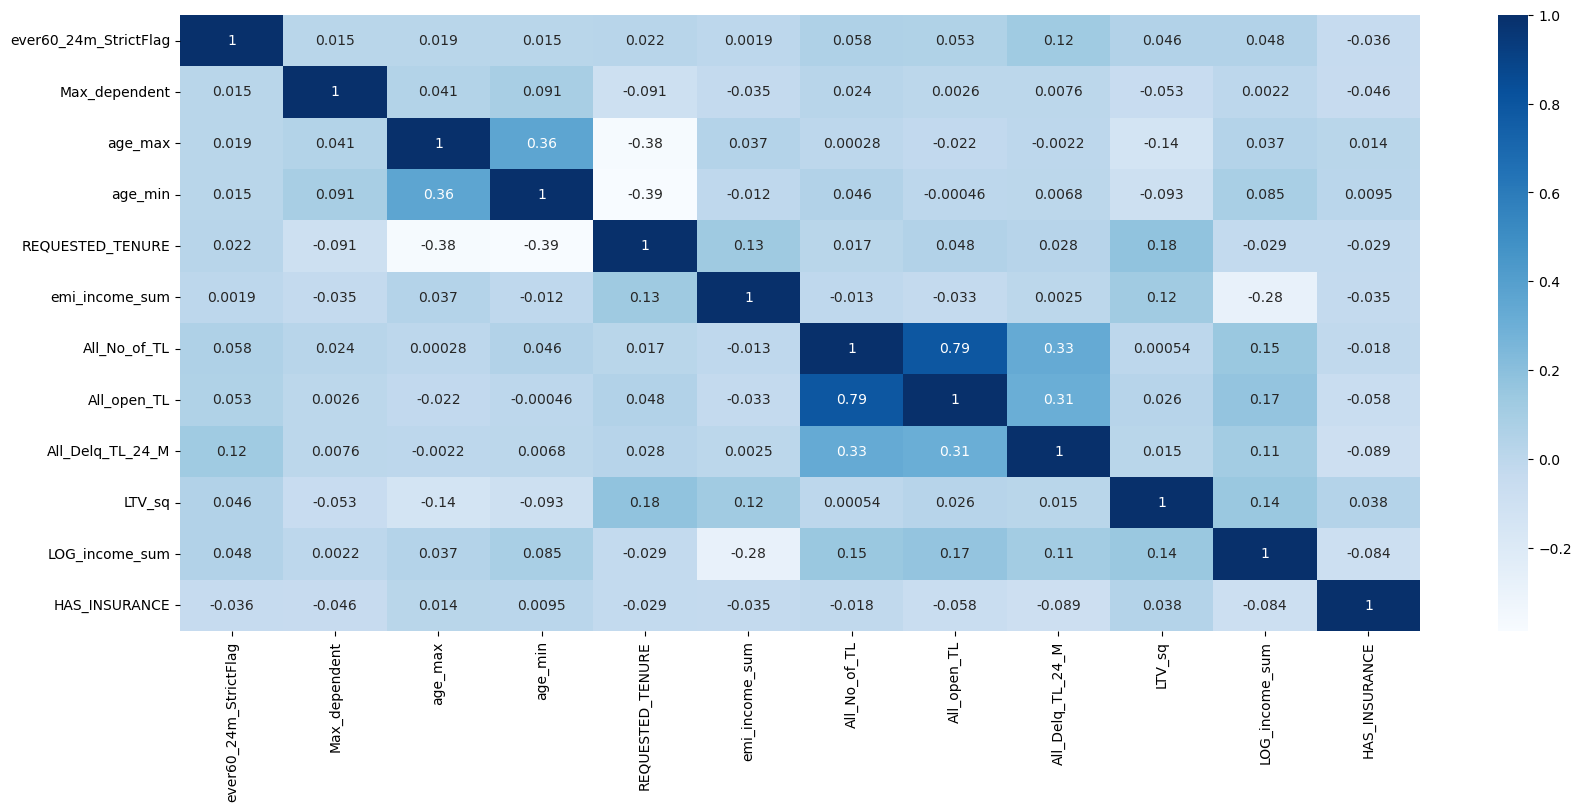

In [203]:
plt.figure(figsize=(20,8))
sns.heatmap(num_cols.corr(),annot=True, cmap = 'Blues')

Discrete or ordinal numerical columns

REQUESTED_TENURE, age_max, All_No_of_TL, age_min, All_open_TL, All_Delq_TL_24_M, Max_dependent 

1. REQUESTED_TENURE

In [220]:
df['REQUESTED_TENURE'].head()

0    240.0
1    180.0
2    240.0
3    240.0
4    324.0
Name: REQUESTED_TENURE, dtype: float64

In [221]:
df['REQUESTED_TENURE'] = (df['REQUESTED_TENURE']/12).round(0)

In [226]:
df['REQUESTED_TENURE'].value_counts().sort_index()

REQUESTED_TENURE
3.0        3
4.0       12
5.0       50
6.0       35
7.0       87
8.0       91
9.0       79
10.0     511
11.0     106
12.0     234
13.0     190
14.0     185
15.0    1549
16.0     201
17.0     221
18.0     294
19.0     227
20.0    5176
21.0      99
22.0     158
23.0     160
24.0     129
25.0    1166
26.0      86
27.0     107
28.0      96
29.0      75
30.0     816
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

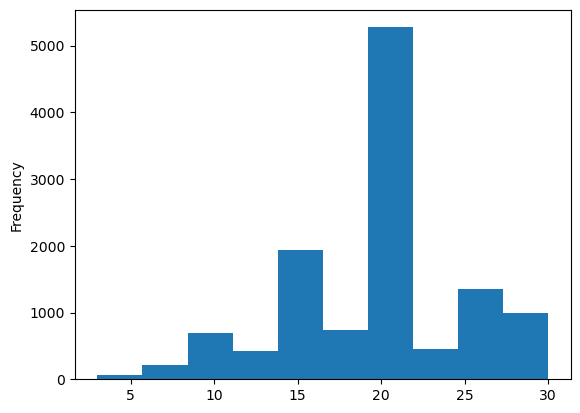

In [227]:
df['REQUESTED_TENURE'].plot(kind = 'hist')

2. age_max and 3. age_min

0.5778253696208892

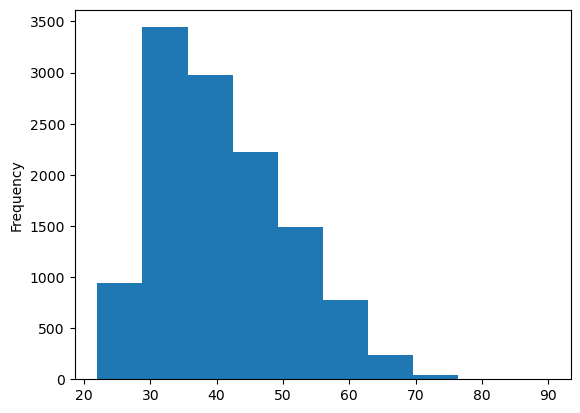

In [232]:
df['age_max'].plot(kind = 'hist')
df['age_max'].skew()

0.7277184318453149

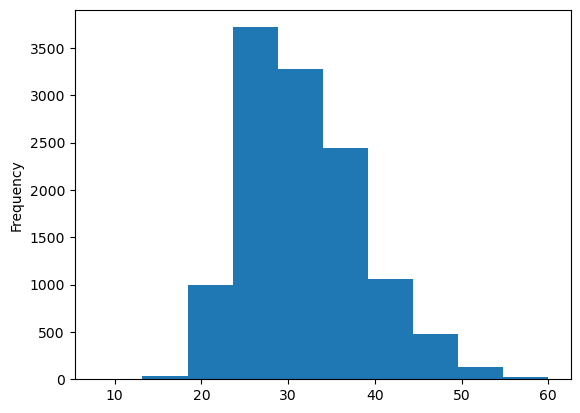

In [234]:
df['age_min'].plot(kind = 'hist')
df['age_min'].skew()

Both age_max and age_min indicate moderate skewness which is safe for age features

4. All_No_of_TL & 5. All_open_TL

In [243]:
df['All_No_of_TL'].value_counts().sort_index()

All_No_of_TL
1      4190
2      2431
3      1587
4       996
5       720
6       553
7       385
8       298
9       195
10      148
11      126
12       84
13       71
14       65
15       49
16       39
17       41
18       19
19       15
20       24
21       12
22        5
23       12
24       10
25        5
26        6
27        7
28        5
29        3
30        5
31        4
32        3
33        4
34        1
35        1
36        3
37        3
38        2
40        2
41        1
43        1
44        1
46        1
48        1
50        1
51        1
52        1
72        2
100       1
113       1
131       1
304       1
Name: count, dtype: int64

In [248]:
df['All_open_TL'].value_counts().sort_index()

All_open_TL
0      2379
1      4609
2      2291
3      1176
4       726
5       393
6       218
7       142
8        75
9        48
10       27
11       16
12       17
13        8
14        5
15        1
16        1
17        1
18        3
19        1
21        1
22        1
23        1
24        1
29        1
159       1
Name: count, dtype: int64

In [249]:
correlation_with_target = df[['All_open_TL', 'All_No_of_TL', 'ever60_24m_StrictFlag']].corr()

correlation_with_target['ever60_24m_StrictFlag'].sort_values(ascending=False)

ever60_24m_StrictFlag    1.000000
All_No_of_TL             0.057963
All_open_TL              0.053334
Name: ever60_24m_StrictFlag, dtype: float64

In [250]:
df['open_TL_ratio'] = df['All_open_TL'] / (df['All_No_of_TL'] + 1e-5)

In [251]:
df[['open_TL_ratio','ever60_24m_StrictFlag']].corr()

,open_TL_ratio,ever60_24m_StrictFlag
open_TL_ratio,1.00000,0.02259
ever60_24m_StrictFlag,0.02259,1.00000


In [252]:
df['open_TL_ratio'].value_counts()

open_TL_ratio
0.999990    2615
0.000000    2379
0.499998    1043
0.999995     912
0.666664     593
            ... 
0.696969       1
0.650000       1
0.333333       1
0.400000       1
0.360000       1
Name: count, Length: 239, dtype: int64

In [253]:
# Filter only the default cases
default_cases = df[df['ever60_24m_StrictFlag'] == 1]

# View distribution of open accounts among defaulters
open_tl_distribution = default_cases['All_open_TL'].value_counts().sort_index()

print(open_tl_distribution)

All_open_TL
0     111
1     287
2     185
3     100
4      72
5      34
6      19
7      19
8       9
9       7
10      1
11      2
12      4
13      1
14      3
21      1
Name: count, dtype: int64


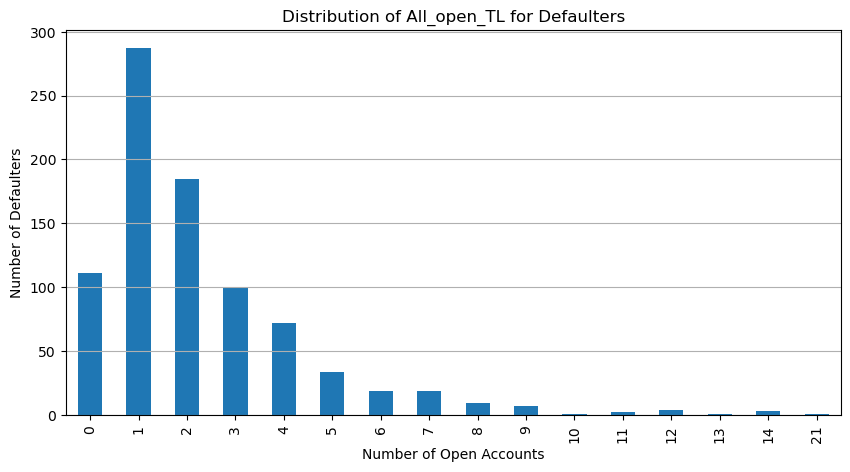

In [255]:
open_tl_distribution.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of All_open_TL for Defaulters')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Number of Defaulters')
plt.grid(axis='y')
plt.show()

In [256]:
bins = [-1, 0, 2, 4, 8, np.inf]
labels = ['0', '1-2', '3-4', '5-8', '9+']
df['active_loans'] = pd.cut(df['All_open_TL'], bins=bins, labels=labels)

In [257]:
df['active_loans']=df['active_loans'].astype('object')
df['active_loans'].fillna('0',inplace=True)

In [258]:
label_encoder = preprocessing.LabelEncoder()

df['active_loans'] = label_encoder.fit_transform(df['active_loans'])

In [261]:
pd.crosstab(df['active_loans'],df['All_No_of_TL'])

All_No_of_TL,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,43,44,46,48,50,51,52,72,100,113,131,304
active_loans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1575,476,173,71,28,24,9,5,2,4,1,3,0,2,0,2,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2615,1955,1063,540,292,164,83,66,31,30,20,8,4,8,8,2,3,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,351,385,356,260,175,108,67,45,40,27,16,21,5,8,11,2,5,2,2,3,2,2,0,2,1,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,44,105,118,119,94,62,53,43,41,30,27,20,16,8,4,8,4,2,7,3,1,3,2,1,0,4,2,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,1,7,12,3,10,4,9,7,10,9,5,13,6,0,1,5,3,1,3,3,2,1,2,0,3,0,0,1,2,1,2,1,1,0,0,1,1,1,1,0,1,0,0,1


In [263]:
df.drop(['All_open_TL', 'All_No_of_TL'], axis = 1, inplace = True)

6. Max_dependent

In [281]:
df['Max_dependent'].unique()

array([ 0,  2,  6,  1,  3,  5,  4, 33,  9, 10,  8, 29,  7, 23, 52],
      dtype=int64)

In [283]:
df['Max_dependent'].value_counts().sort_index()

Max_dependent
0     4833
1     2115
2     3311
3     1409
4      373
5       79
6       14
7        2
8        1
9        1
10       1
23       1
29       1
33       1
52       1
Name: count, dtype: int64

In [285]:
df['Max_dependent_capped'] = df['Max_dependent'].apply(lambda x : x if x <= 5 else 5 )

def dependent_category(x):
    if x == 0:
        return 'None'
    elif x <= 2:
        return 'Low'
    elif x <= 4:
        return 'Medium'
    else:
        return 'High'

df['dependent_band'] = df['Max_dependent_capped'].apply(dependent_category)

In [287]:
label_encoder = preprocessing.LabelEncoder()

df['dependent_band_encoded'] = label_encoder.fit_transform(df['dependent_band'])

In [289]:
df.drop(['Max_dependent_capped','dependent_band'],axis = 1, inplace = True)

df.drop(['Max_dependent'],axis = 1, inplace = True)

7. All_Delq_TL_24_M

In [292]:
df['All_Delq_TL_24_M'].value_counts()

All_Delq_TL_24_M
0     9619
1     1924
2      397
3      119
4       49
5       16
7        9
6        4
10       1
13       1
8        1
15       1
11       1
14       1
Name: count, dtype: int64

In [294]:
df['has_delinquency'] = df['All_Delq_TL_24_M'].apply(lambda x: 0 if x == 0 else 1)
df.drop(['All_Delq_TL_24_M'], axis = 1, inplace = True)

In [297]:
num_cols = df.select_dtypes(include = 'number')
num_cols.head()

,ever60_24m_StrictFlag,age_max,age_min,REQUESTED_TENURE,emi_income_sum,LTV_sq,LOG_income_sum,HAS_INSURANCE,open_TL_ratio,active_loans,dependent_band_encoded,has_delinquency
0,0,46,24,20.0,0.456037,0.512031,9.341105,1,0.499999,1,3,0
1,0,47,44,15.0,0.472611,0.296440,10.183884,1,0.333332,1,1,1
2,0,35,35,20.0,0.486684,0.320369,10.064266,1,0.999995,1,0,0
3,0,39,34,20.0,0.447599,0.287784,10.651857,1,0.499998,1,3,0
4,0,32,28,27.0,0.619159,0.262092,9.770356,0,0.000000,0,1,0


Categorical Columns

In [301]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.head()

,Doc_form_16,edu_max,edu_min,cnt_coapplicant,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,Latest_Bureau_prd,Bureau_TL,enquiry_risk
0,0,3,2,1,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,CC,2.<6 CC,Moderate Risk
1,0,3,3,1,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,HL,7.<36 AL HL LAS,Low Risk
2,0,3,3,1,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,BL_PSL,12.>36 PL TWL GL,Low Risk
3,0,3,3,1,1.Others,SALARIED,DSA,1,Builder UNC,SAL,AL,13.>36 Others,Low Risk
4,0,3,3,1,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,CC,11.>36 CC,Low Risk


In [303]:
for col in cat_cols:  
    print(f"\nColumn : {col}")
    print(f"Unique values ({df[col].nunique()}): ")
    print(df[col].unique())


Column : Doc_form_16
Unique values (2): 
[0 1]

Column : edu_max
Unique values (4): 
[3 4 1 2]

Column : edu_min
Unique values (4): 
[2 3 1 4]

Column : cnt_coapplicant
Unique values (5): 
[1 0 2 3 4]

Column : Organization_type
Unique values (5): 
['3.Private Ltd Co' '1.Others' '5.MNC' '4.Public Ltd. Co.' '2.Govt']

Column : SALARIED_SELF
Unique values (3): 
['SALARIED' 'SELF_EMP' 'OTHERS']

Column : CHANNEL_CODE
Unique values (8): 
['DSA' 'CROSS SALES' 'UBL Sales' 'ALTERNATE CHANNELS' 'DIRECT' 'IBM'
 'Open Market sales' 'DIGITAL CIRCLE']

Column : City_tier
Unique values (3): 
[1 3 2]

Column : Loan_sub_type_1
Unique values (5): 
['Builder Ready' 'Self Construction' 'Builder UNC' 'Resale Ready'
 'Others+P_Cons']

Column : SAL_FLAG
Unique values (2): 
['SAL' 'NONSAL']

Column : Latest_Bureau_prd
Unique values (12): 
['CC' 'HL' 'BL_PSL' 'AL' 'CL' 'Others' 'TWL' 'BL' 'PL' 'GL' 'OD/EL' 'LAS']

Column : Bureau_TL
Unique values (12): 
['2.<6 CC' '7.<36 AL HL LAS' '12.>36 PL TWL GL' '13.>3

FEATURE ENCODING

1. Organization_type

In [308]:
label_encoder = preprocessing.LabelEncoder()
df['Organization_type']= label_encoder.fit_transform(df['Organization_type'])
df['Organization_type'].unique()

array([2, 0, 4, 3, 1])

2. SALARIED_SELF

In [312]:
pd.crosstab(df['SALARIED_SELF'],df['SAL_FLAG'])

SAL_FLAG,NONSAL,SAL
SALARIED_SELF,,
OTHERS,55,0
SALARIED,0,6766
SELF_EMP,5322,0


In [314]:
#Dropping SALARIED_SELF since there's a perfect mapping between the SALARIED_SELF column and SAL_FLAG:

df.drop(['SALARIED_SELF'], axis=1, inplace=True)

3. CHANNEL_CODE

In [318]:
#Grouping CHANNEL_CODE

def simplify_CHANNEL_CODE(x):
    if x in ['CROSS SALES','DIRECT','IBM']:
        return 'Low Risk'
    elif x in ['UBL Sales','DSA']:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['CHANNEL_CODE_GROUPED'] = df['CHANNEL_CODE'].apply(simplify_CHANNEL_CODE)

In [320]:
label_encoder = preprocessing.LabelEncoder()
df['CHANNEL_CODE_GROUPED']= label_encoder.fit_transform(df['CHANNEL_CODE_GROUPED'])
df['CHANNEL_CODE_GROUPED'].unique()

array([2, 1, 0])

In [322]:
df.drop(['CHANNEL_CODE'],axis = 1, inplace = True)

4. Loan_sub_type_1

In [326]:
label_encoder = preprocessing.LabelEncoder()
df['Loan_sub_type_1']= label_encoder.fit_transform(df['Loan_sub_type_1'])
df['Loan_sub_type_1'].unique()

array([0, 4, 1, 3, 2])

In [328]:
df['Loan_sub_type_1'].value_counts().sort_values(ascending= False)

Loan_sub_type_1
0    4203
1    3400
3    2531
4    1581
2     428
Name: count, dtype: int64

5. SAL_FLAG

In [332]:
#Binary encoding

df['SAL_FLAG'] = df['SAL_FLAG'].map({'SAL': 1, 'NONSAL': 0})

6. Latest_Bureau_prd and 7. Bureau_TL

In [336]:
pd.crosstab(df['Latest_Bureau_prd'],df['Bureau_TL'])

Bureau_TL,10.<36 Others,11.>36 CC,12.>36 PL TWL GL,13.>36 Others,2.<6 CC,3.<6 PL,4.<6 BL CL Oth,5.<6 Others,6.<36 PL,7.<36 AL HL LAS,8.<36 TWL GL,9.<36 CC
Latest_Bureau_prd,,,,,,,,,,,,
AL,0,0,0,240,0,0,0,94,0,495,0,0
BL,106,0,0,45,0,0,45,0,0,0,0,0
BL_PSL,0,0,103,0,0,0,0,135,0,0,223,0
CC,0,350,0,0,767,0,0,0,0,0,0,1474
CL,1599,0,0,194,0,0,906,0,0,0,0,0
GL,0,0,54,0,0,0,0,493,0,0,601,0
HL,0,0,0,206,0,0,0,57,0,327,0,0
LAS,0,0,0,3,0,0,0,2,0,11,0,0
OD/EL,11,0,0,43,0,0,0,1,0,0,0,0


In [338]:
cramers_v(df['Latest_Bureau_prd'],df['Bureau_TL'])

0.5764905738702648

In [340]:
#Dropping Bureau_TL since there's a perfect mapping between the Bureau_TL column and Latest_Bureau_prd:

df.drop(['Bureau_TL'], axis=1, inplace=True)

In [342]:
def simplify_bureau_product(x):
    if x in ['CC', 'PL', 'CL']:
        return 'Unsecured'
    elif x in ['HL', 'AL', 'TWL', 'GL', 'LAS']:
        return 'Secured'
    else:
        return 'Other'

df['Bureau_prd_grouped'] = df['Latest_Bureau_prd'].apply(simplify_bureau_product)

In [344]:
label_encoder = preprocessing.LabelEncoder()
df['Bureau_prd_grouped']= label_encoder.fit_transform(df['Bureau_prd_grouped'])
df['Bureau_prd_grouped'].unique()

array([2, 1, 0])

In [346]:
df.drop(['Latest_Bureau_prd'],axis = 1, inplace = True)

8. enquiry_risk

In [349]:
label_encoder = preprocessing.LabelEncoder()
df['enquiry_risk']= label_encoder.fit_transform(df['enquiry_risk'])
df['enquiry_risk'].unique()

array([2, 1, 0, 3])

9. edu_max and 10. edu_min

In [352]:
pd.crosstab(df['edu_max'],df['edu_min'])

edu_min,1,2,3,4
edu_max,,,,
1,1010,0,0,0
2,391,2348,0,0
3,761,1901,4097,0
4,211,287,763,374


In [354]:
cramers_v(df['edu_max'],df['edu_min'])

0.5423550698379771

In [356]:
#Dropping edu_min as we can consider education of primary applicant as important

In [358]:
df.drop(['edu_min'], axis = 1, inplace = True)

11. cnt_coapplicant

In [361]:
df['cnt_coapplicant'].value_counts()

cnt_coapplicant
1    11606
2      404
0       69
3       58
4        6
Name: count, dtype: int64

In [363]:
df['has_coapplicant'] = df['cnt_coapplicant'].apply(lambda x: 0 if x == 0 else 1)

In [365]:
df.drop(['cnt_coapplicant'], axis = 1, inplace = True)

In [368]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.head() 

,Doc_form_16,edu_max,City_tier
0,0,3,1
1,0,3,3
2,0,3,3
3,0,3,1
4,0,3,1


In [371]:
df.head()

,ever60_24m_StrictFlag,Doc_form_16,edu_max,age_max,age_min,REQUESTED_TENURE,Organization_type,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,enquiry_risk,LTV_sq,LOG_income_sum,HAS_INSURANCE,open_TL_ratio,active_loans,dependent_band_encoded,has_delinquency,CHANNEL_CODE_GROUPED,Bureau_prd_grouped,has_coapplicant
0,0,0,3,46,24,20.0,2,1,0,1,0.456037,2,0.512031,9.341105,1,0.499999,1,3,0,2,2,1
1,0,0,3,47,44,15.0,2,3,4,0,0.472611,1,0.296440,10.183884,1,0.333332,1,1,1,2,1,1
2,0,0,3,35,35,20.0,2,3,4,0,0.486684,1,0.320369,10.064266,1,0.999995,1,0,0,1,0,1
3,0,0,3,39,34,20.0,0,1,1,1,0.447599,1,0.287784,10.651857,1,0.499998,1,3,0,2,1,1
4,0,0,3,32,28,27.0,2,1,0,1,0.619159,1,0.262092,9.770356,0,0.000000,0,1,0,2,2,1


Column : emi_income_sum

-0.3947100998352144

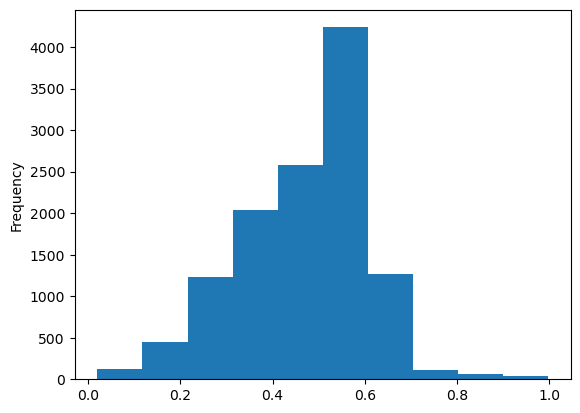

In [375]:
df['emi_income_sum'].plot(kind = 'hist')
df['emi_income_sum'].skew()

In [377]:
#Using Z score for identifying outliers

from scipy.stats import zscore
emi_income_z = zscore(df['emi_income_sum'])
upper = df['emi_income_sum'].mean() + 3*(df['emi_income_sum'].std())
lower = df['emi_income_sum'].mean() - 3*(df['emi_income_sum'].std())
print(f"Upper limit : {upper}")
print(f"Lower limit : {lower}")
emi_income_outlier = (emi_income_z.abs() > 3).astype(int)  #Flags outlier into boolean 1 as outlier and 0 as normal


Upper limit : 0.8936726830782096
Lower limit : 0.05291073352328918


In [379]:
emi_income_outlier.value_counts()

emi_income_sum
0    12082
1       61
Name: count, dtype: int64

It shows there are very few extreme values and emi_income_sum is an important feature whose outliers are  good for modeling

Creating new feature 

In [383]:
#New feature showing if the values are outlier or not

df['emi_income_risk_flag'] = emi_income_outlier.astype(int)

In [385]:
#New Feature :  financial stress or debt burden

df['emi_stress_score'] = df['emi_income_sum'] / df['LOG_income_sum']

<Axes: xlabel='emi_stress_score', ylabel='Count'>

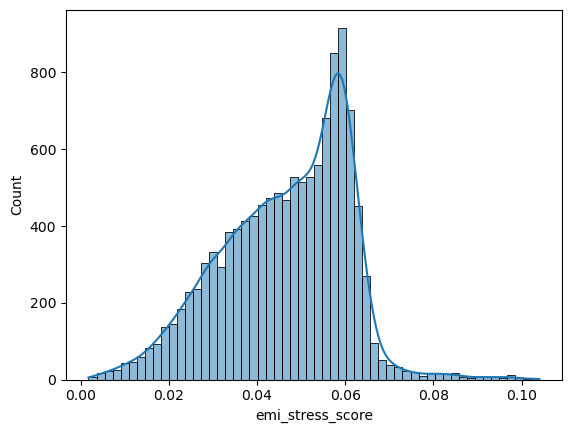

In [387]:
sns.histplot(df['emi_stress_score'], kde = True)

<Axes: xlabel='emi_stress_score'>

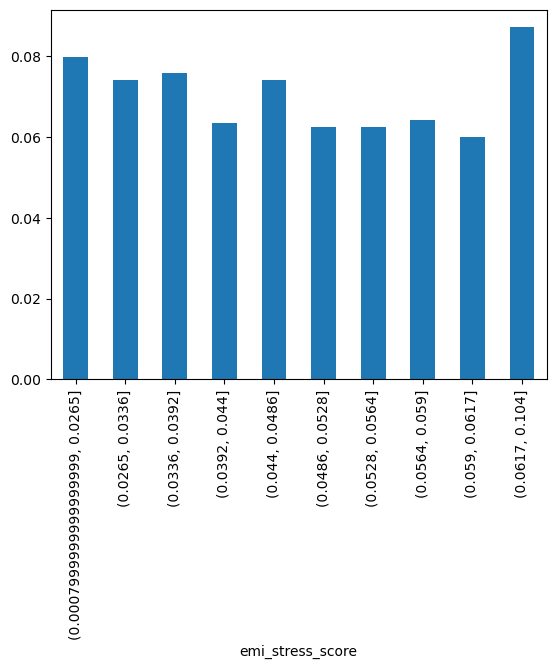

In [388]:
#quantile-based discretization 

emi_stress_score_bin = pd.qcut(df['emi_stress_score'], q=10)
df.groupby(emi_stress_score_bin)['ever60_24m_StrictFlag'].mean().plot(kind='bar')

In [389]:
emi_stress_threshold = df['emi_stress_score'].quantile(0.9)
emi_stress_threshold

0.06174102060459954

In [393]:
df['emi_stress_flag'] = (df['emi_stress_score'] > 0.0617).astype(int)

In [395]:
df.drop(['emi_stress_score'], axis = 1, inplace = True)

In [399]:
df

,ever60_24m_StrictFlag,Doc_form_16,edu_max,age_max,age_min,REQUESTED_TENURE,Organization_type,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,enquiry_risk,LTV_sq,LOG_income_sum,HAS_INSURANCE,open_TL_ratio,active_loans,dependent_band_encoded,has_delinquency,CHANNEL_CODE_GROUPED,Bureau_prd_grouped,has_coapplicant,emi_income_risk_flag,emi_stress_flag
0,0,0,3,46,24,20.0,2,1,0,1,0.456037,2,0.512031,9.341105,1,0.499999,1,3,0,2,2,1,0,0
1,0,0,3,47,44,15.0,2,3,4,0,0.472611,1,0.296440,10.183884,1,0.333332,1,1,1,2,1,1,0,0
2,0,0,3,35,35,20.0,2,3,4,0,0.486684,1,0.320369,10.064266,1,0.999995,1,0,0,1,0,1,0,0
3,0,0,3,39,34,20.0,0,1,1,1,0.447599,1,0.287784,10.651857,1,0.499998,1,3,0,2,1,1,0,0
4,0,0,3,32,28,27.0,2,1,0,1,0.619159,1,0.262092,9.770356,0,0.000000,0,1,0,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,0,0,3,29,29,20.0,3,1,3,1,0.307412,1,0.635559,10.626266,1,0.000000,0,2,0,1,2,1,0,0
13405,0,0,3,32,31,20.0,2,3,0,1,0.460021,2,0.639659,11.032613,0,0.499999,1,1,0,2,2,1,0,0
13406,0,0,2,50,46,15.0,2,2,3,0,0.440446,1,0.256174,10.329333,1,0.999990,1,3,0,2,1,1,0,0
13407,0,0,2,50,46,13.0,2,2,3,0,0.145836,1,0.024047,10.329333,0,0.999990,1,3,0,2,1,1,0,0


In [401]:
df.shape

(12143, 24)

In [403]:
df.describe()

,ever60_24m_StrictFlag,age_max,age_min,REQUESTED_TENURE,Organization_type,Loan_sub_type_1,SAL_FLAG,emi_income_sum,enquiry_risk,LTV_sq,LOG_income_sum,HAS_INSURANCE,open_TL_ratio,active_loans,dependent_band_encoded,has_delinquency,CHANNEL_CODE_GROUPED,Bureau_prd_grouped,has_coapplicant,emi_income_risk_flag,emi_stress_flag
count,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000,12143.000000
mean,0.070411,40.836037,31.522688,19.434324,1.823273,1.496582,0.557193,0.473292,1.195833,0.403597,10.233507,0.618463,0.570071,1.130198,1.934365,0.207856,1.416372,1.375278,0.994318,0.005023,0.101211
std,0.255849,9.894696,6.792241,5.189835,0.691189,1.463035,0.496739,0.140127,0.747935,0.210208,0.406832,0.485784,0.378863,0.841262,0.934993,0.405790,0.593354,0.707448,0.075170,0.070701,0.301620
min,0.000000,22.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.019636,0.000000,0.016567,9.210440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,26.000000,15.000000,2.000000,0.000000,0.000000,0.375956,1.000000,0.235793,9.973371,0.000000,0.250000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,39.000000,30.000000,20.000000,2.000000,1.000000,1.000000,0.496005,1.000000,0.394458,10.212925,1.000000,0.555555,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,0.000000,48.000000,36.000000,20.000000,2.000000,3.000000,1.000000,0.588600,2.000000,0.587634,10.521911,1.000000,0.999990,1.000000,3.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000
max,1.000000,90.000000,60.000000,30.000000,4.000000,4.000000,1.000000,0.998253,3.000000,0.802491,11.133436,1.000000,0.999999,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000


Feature Selection

1.  Numerical Features : t - Test

In [408]:
num_cols = df.select_dtypes(include = 'number')
num_cols.nunique().sort_values(ascending = False)

emi_income_sum            12064
LTV_sq                    10525
LOG_income_sum             9623
open_TL_ratio               239
age_max                      60
age_min                      44
REQUESTED_TENURE             28
Organization_type             5
Loan_sub_type_1               5
active_loans                  5
enquiry_risk                  4
dependent_band_encoded        4
CHANNEL_CODE_GROUPED          3
Bureau_prd_grouped            3
emi_income_risk_flag          2
has_coapplicant               2
ever60_24m_StrictFlag         2
has_delinquency               2
HAS_INSURANCE                 2
SAL_FLAG                      2
emi_stress_flag               2
dtype: int64

In [410]:
#Continuous or ordinal numerical features

num_features = ['emi_income_sum',  'LTV_sq',  'LOG_income_sum', 'open_TL_ratio', 'age_max', 'age_min', 'REQUESTED_TENURE']

In [412]:
from scipy.stats import ttest_ind

target_col = 'ever60_24m_StrictFlag'

selected_features = []

for feature in num_features:
    group0 = df[df[target_col] == 0][feature]
    group1 = df[df[target_col] == 1][feature]

    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
    print(f"Feature: {feature}, p-value: {p_val}")

    if p_val < 0.05:
        selected_features.append(feature)

print("\nSelected features based on t-test:", selected_features)


Feature: emi_income_sum, p-value: 0.8475773670288672
Feature: LTV_sq, p-value: 5.306522437368567e-07
Feature: LOG_income_sum, p-value: 1.9880541831768785e-07
Feature: open_TL_ratio, p-value: 0.008188221188956065
Feature: age_max, p-value: 0.041104743183791995
Feature: age_min, p-value: 0.09764574646386065
Feature: REQUESTED_TENURE, p-value: 0.015898551260733945

Selected features based on t-test: ['LTV_sq', 'LOG_income_sum', 'open_TL_ratio', 'age_max', 'REQUESTED_TENURE']


In [414]:
final_num_features = selected_features
final_num_features

['LTV_sq', 'LOG_income_sum', 'open_TL_ratio', 'age_max', 'REQUESTED_TENURE']

In [416]:
df[final_num_features]

,LTV_sq,LOG_income_sum,open_TL_ratio,age_max,REQUESTED_TENURE
0,0.512031,9.341105,0.499999,46,20.0
1,0.296440,10.183884,0.333332,47,15.0
2,0.320369,10.064266,0.999995,35,20.0
3,0.287784,10.651857,0.499998,39,20.0
4,0.262092,9.770356,0.000000,32,27.0
...,...,...,...,...,...
13404,0.635559,10.626266,0.000000,29,20.0
13405,0.639659,11.032613,0.499999,32,20.0
13406,0.256174,10.329333,0.999990,50,15.0
13407,0.024047,10.329333,0.999990,50,13.0


2. Categorical features - •	Chi-Square Test 

In [419]:
categorical_features = [col for col in df.columns if col not in num_features and col != 'ever60_24m_StrictFlag']
categorical_features

['Doc_form_16',
 'edu_max',
 'Organization_type',
 'City_tier',
 'Loan_sub_type_1',
 'SAL_FLAG',
 'enquiry_risk',
 'HAS_INSURANCE',
 'active_loans',
 'dependent_band_encoded',
 'has_delinquency',
 'CHANNEL_CODE_GROUPED',
 'Bureau_prd_grouped',
 'has_coapplicant',
 'emi_income_risk_flag',
 'emi_stress_flag']

In [421]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target
X_cat = df[categorical_features]  # only categorical features
y = df['ever60_24m_StrictFlag']

In [422]:
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Use 'all' to get all scores
chi2_selector.fit(X_cat, y)

SelectKBest(k='all', score_func=<function chi2 at 0x0000020EDC7A1D00>)

In [425]:
chi2_scores = pd.Series(chi2_selector.scores_, index=X_cat.columns)
chi2_pvalues = pd.Series(chi2_selector.pvalues_, index=X_cat.columns)

In [427]:
chi2_results = pd.DataFrame({
    'Chi2 Score': chi2_scores,
    'p-value': chi2_pvalues
}).sort_values(by='Chi2 Score', ascending=False)

# Select features with p-value < 0.05 (commonly used threshold)
final_cat_features = chi2_results[chi2_results['p-value'] < 0.05].index.tolist()

In [429]:
print("Selected Categorical Features based on Chi-Square Test:")
final_cat_features

Selected Categorical Features based on Chi-Square Test:


['has_delinquency',
 'SAL_FLAG',
 'active_loans',
 'Loan_sub_type_1',
 'enquiry_risk',
 'Bureau_prd_grouped',
 'Doc_form_16',
 'HAS_INSURANCE',
 'emi_stress_flag',
 'CHANNEL_CODE_GROUPED']

In [431]:
df[final_cat_features]

,has_delinquency,SAL_FLAG,active_loans,Loan_sub_type_1,enquiry_risk,Bureau_prd_grouped,Doc_form_16,HAS_INSURANCE,emi_stress_flag,CHANNEL_CODE_GROUPED
0,0,1,1,0,2,2,0,1,0,2
1,1,0,1,4,1,1,0,1,0,2
2,0,0,1,4,1,0,0,1,0,1
3,0,1,1,1,1,1,0,1,0,2
4,0,1,0,0,1,2,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
13404,0,1,0,3,1,2,0,1,0,1
13405,0,1,1,0,2,2,0,0,0,2
13406,0,0,1,3,1,1,0,1,0,2
13407,0,0,1,3,1,1,0,0,0,2


SCALING

In [435]:
final_num_features_cols = df[final_num_features].columns

In [437]:
scaler = StandardScaler()

scaled_num_features = scaler.fit_transform(df[final_num_features])

In [439]:
df[final_num_features] = pd.DataFrame(scaled_num_features, columns = final_num_features_cols, index=df.index)
df[final_num_features]

,LTV_sq,LOG_income_sum,open_TL_ratio,age_max,REQUESTED_TENURE
0,0.515865,-2.193629,-0.184962,0.521914,0.109001
1,-0.509784,-0.121980,-0.624892,0.622982,-0.854460
2,-0.395944,-0.416014,1.134819,-0.589839,0.109001
3,-0.550967,1.028352,-0.184965,-0.185565,0.109001
4,-0.673194,-1.138480,-1.504750,-0.893044,1.457847
...,...,...,...,...,...
13404,1.103537,0.965448,-1.504750,-1.196249,0.109001
13405,1.123040,1.964296,-0.184962,-0.893044,0.109001
13406,-0.701345,0.235551,1.134806,0.926187,-0.854460
13407,-1.805668,0.235551,1.134806,0.926187,-1.239845


In [441]:
print(df[final_num_features].mean())  # Should all be ~0
print(df[final_num_features].std())   # Should all be ~1

LTV_sq             -1.626706e-16
LOG_income_sum      2.340584e-17
open_TL_ratio      -2.808701e-17
age_max            -1.755438e-16
REQUESTED_TENURE    2.890621e-16
dtype: float64
LTV_sq              1.000041
LOG_income_sum      1.000041
open_TL_ratio       1.000041
age_max             1.000041
REQUESTED_TENURE    1.000041
dtype: float64


<Axes: >

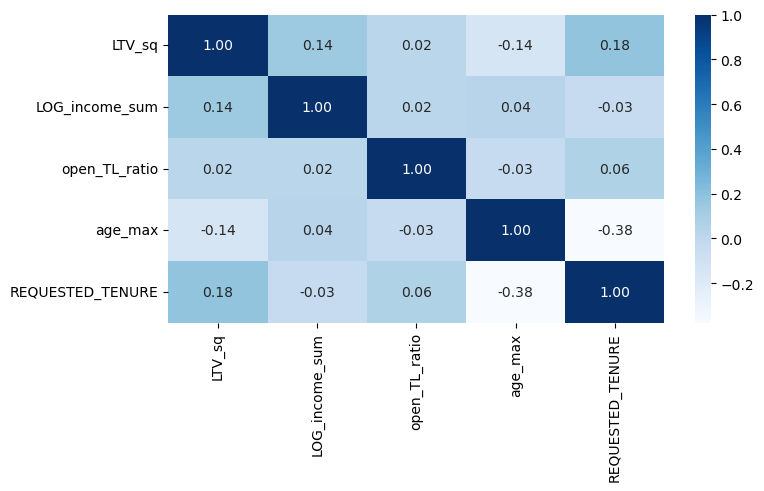

In [443]:
plt.figure(figsize = (8,4))
sns.heatmap(df[final_num_features].corr(), annot = True, fmt= '.2f', cmap = 'Blues')

In [445]:
final_df = pd.concat([df[final_num_features], df[final_cat_features], df['ever60_24m_StrictFlag'] ], axis=1)

In [447]:
final_df

,LTV_sq,LOG_income_sum,open_TL_ratio,age_max,REQUESTED_TENURE,has_delinquency,SAL_FLAG,active_loans,Loan_sub_type_1,enquiry_risk,Bureau_prd_grouped,Doc_form_16,HAS_INSURANCE,emi_stress_flag,CHANNEL_CODE_GROUPED,ever60_24m_StrictFlag
0,0.515865,-2.193629,-0.184962,0.521914,0.109001,0,1,1,0,2,2,0,1,0,2,0
1,-0.509784,-0.121980,-0.624892,0.622982,-0.854460,1,0,1,4,1,1,0,1,0,2,0
2,-0.395944,-0.416014,1.134819,-0.589839,0.109001,0,0,1,4,1,0,0,1,0,1,0
3,-0.550967,1.028352,-0.184965,-0.185565,0.109001,0,1,1,1,1,1,0,1,0,2,0
4,-0.673194,-1.138480,-1.504750,-0.893044,1.457847,0,1,0,0,1,2,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,1.103537,0.965448,-1.504750,-1.196249,0.109001,0,1,0,3,1,2,0,1,0,1,0
13405,1.123040,1.964296,-0.184962,-0.893044,0.109001,0,1,1,0,2,2,0,0,0,2,0
13406,-0.701345,0.235551,1.134806,0.926187,-0.854460,0,0,1,3,1,1,0,1,0,2,0
13407,-1.805668,0.235551,1.134806,0.926187,-1.239845,0,0,1,3,1,1,0,0,0,2,0


In [462]:
final_df.to_csv('loan default preprocessed df.csv', index=False)

Mutual Information

In [464]:
from sklearn.feature_selection import mutual_info_classif

X = final_df.drop(['ever60_24m_StrictFlag'], axis = 1)
y = final_df['ever60_24m_StrictFlag']
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

In [465]:
mi_series.head(16)

SAL_FLAG                0.008421
CHANNEL_CODE_GROUPED    0.007269
has_delinquency         0.006948
HAS_INSURANCE           0.006136
emi_stress_flag         0.003557
active_loans            0.003308
Bureau_prd_grouped      0.002871
enquiry_risk            0.002822
open_TL_ratio           0.002483
LOG_income_sum          0.002304
REQUESTED_TENURE        0.001786
Doc_form_16             0.001155
LTV_sq                  0.001011
Loan_sub_type_1         0.000383
age_max                 0.000000
dtype: float64

<Axes: >

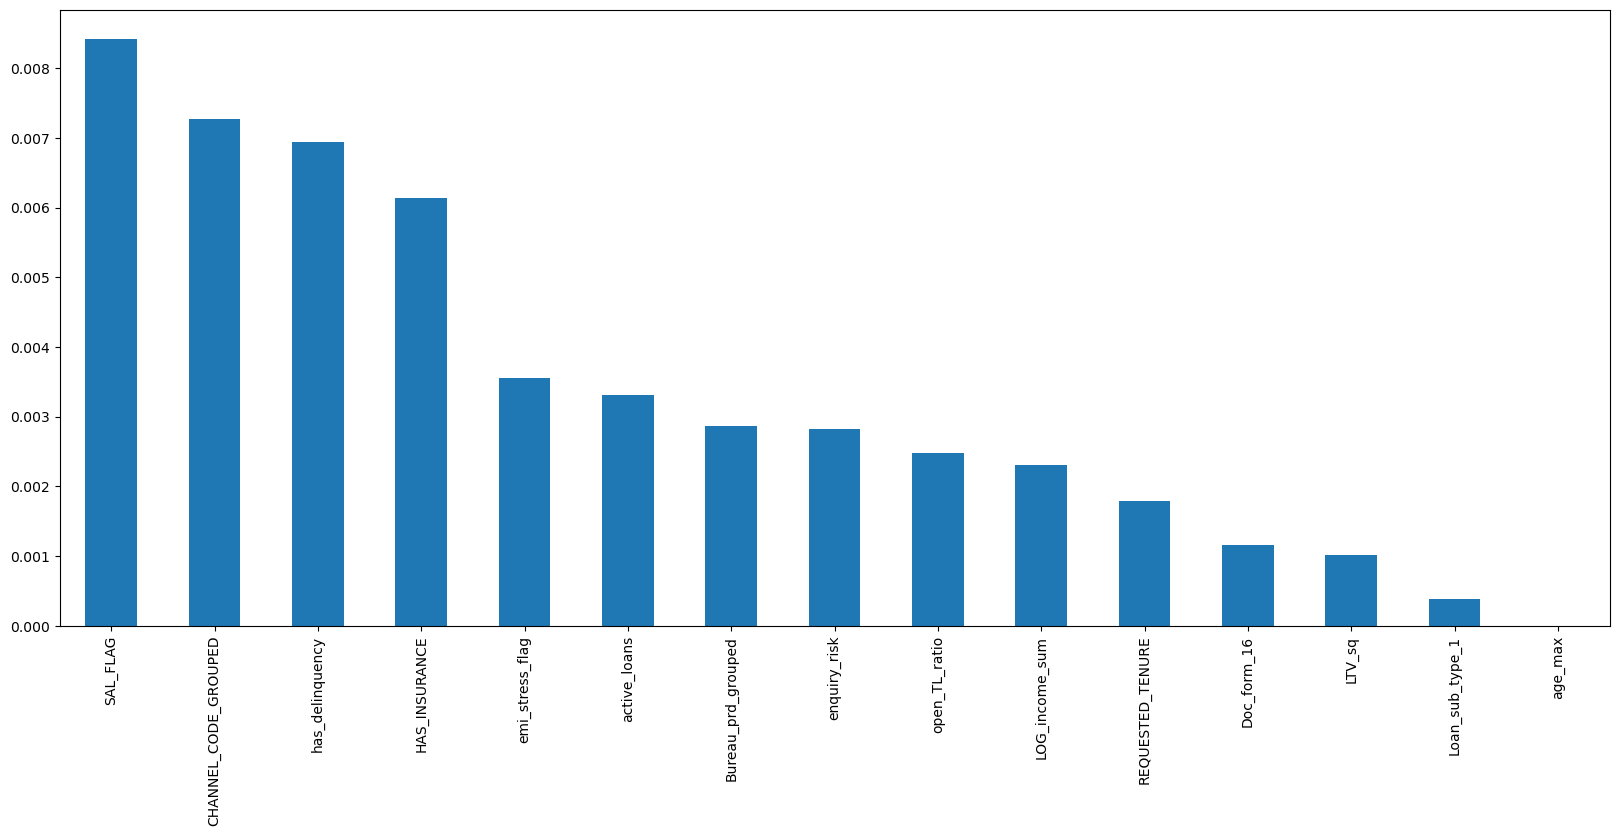

In [468]:
mi_series.plot.bar(figsize = (20,8))

In [470]:
selected_features = mi_series[mi_series > 0.001].index.tolist()

In [472]:
df_model = pd.concat([df[selected_features], df['ever60_24m_StrictFlag'] ], axis=1)

In [474]:
df_model

,SAL_FLAG,CHANNEL_CODE_GROUPED,has_delinquency,HAS_INSURANCE,emi_stress_flag,active_loans,Bureau_prd_grouped,enquiry_risk,open_TL_ratio,LOG_income_sum,REQUESTED_TENURE,Doc_form_16,LTV_sq,ever60_24m_StrictFlag
0,1,2,0,1,0,1,2,2,-0.184962,-2.193629,0.109001,0,0.515865,0
1,0,2,1,1,0,1,1,1,-0.624892,-0.121980,-0.854460,0,-0.509784,0
2,0,1,0,1,0,1,0,1,1.134819,-0.416014,0.109001,0,-0.395944,0
3,1,2,0,1,0,1,1,1,-0.184965,1.028352,0.109001,0,-0.550967,0
4,1,2,0,0,1,0,2,1,-1.504750,-1.138480,1.457847,0,-0.673194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,1,1,0,1,0,0,2,1,-1.504750,0.965448,0.109001,0,1.103537,0
13405,1,2,0,0,0,1,2,2,-0.184962,1.964296,0.109001,0,1.123040,0
13406,0,2,0,1,0,1,1,1,1.134806,0.235551,-0.854460,0,-0.701345,0
13407,0,2,0,0,0,1,1,1,1.134806,0.235551,-1.239845,0,-1.805668,0


In [476]:
df_model.to_csv('selected df.csv', index=False)